### Approach:

1.   Importing modules, Reading the data
2.   Missing Value Handling
3.   Extracting new features and drop redundant ones
4.   Analyzing Numerical Features
    *   Checking Statistical summary
    *   Checking Distribution of numerical features
    *   Inspecting Correlation
    *   Correcting datatype
    *   Univaritate and Bivariate Analysis, Data Visualization
5.  Analyzing Categorical Features
    *   Missing Value Handling
    *   Encoding Categorical Features
    *   Data Visualization
    *   Dropping Redundant Features
6.  Splitting data into Train and Test data
    *   Transformation of Target Variable
    *   Feature Scaling
7.  Primary Feature Selection using RFE
8.  Iterate the model based on p-value and VIF 
9.  Ridge Regression
10.  Lasso Regression
11.  Comparing model coefficients
12.  Model Evaluation 
13. Choosing the final model and most significant features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import warnings
warnings.filterwarnings("ignore")

In [2]:
housing = pd.read_csv('train.csv')

In [3]:
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
#get shape of dataframe
housing.shape

(1460, 81)

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

###### Utility for quick reference to data dictionary 

In [6]:
#Utility for quick reference for data dictionary 
data_dict={}
with open("data_description.txt", 'r') as file_object:
        line = file_object.readlines()
        for i in range(0,len(line)):
            step_0 = line[i].split(':')
            if(len(step_0)>1 and not step_0[0].startswith(" ")):
                data_dict[step_0[0]] = step_0[1].removesuffix('\n')
            


In [7]:
data_dict

{'MSSubClass': ' Identifies the type of dwelling involved in the sale.\t',
 'MSZoning': ' Identifies the general zoning classification of the sale.',
 'LotFrontage': ' Linear feet of street connected to property',
 'LotArea': ' Lot size in square feet',
 'Street': ' Type of road access to property',
 'Alley': ' Type of alley access to property',
 'LotShape': ' General shape of property',
 'LandContour': ' Flatness of the property',
 'Utilities': ' Type of utilities available',
 'LotConfig': ' Lot configuration',
 'LandSlope': ' Slope of property',
 'Neighborhood': ' Physical locations within Ames city limits',
 'Condition1': ' Proximity to various conditions',
 'Condition2': ' Proximity to various conditions (if more than one is present)',
 'BldgType': ' Type of dwelling',
 'HouseStyle': ' Style of dwelling',
 'OverallQual': ' Rates the overall material and finish of the house',
 'OverallCond': ' Rates the overall condition of the house',
 'YearBuilt': ' Original construction date',
 '

##### 1. Check for Null Columns

In [8]:
#cheked any null column exist or not
nuni = housing.nunique()
nuni[nuni==0]

Series([], dtype: int64)

- <font color='blue'> Inference : No Empty Columns  </font>

##### 2. Check Missing Values

In [9]:
# Check Missing Values
missing_values=[x for x in housing.columns if housing[x].isnull().sum()>1]

In [10]:
missing_df = []
for feature in missing_values:
    d = {
    'Feature' : feature,  # some formula for obtaining values
    'MissingCount' : np.round(housing[feature].isnull().sum(),2),
    'MissingPercentage' : (np.round(housing[feature].isnull().sum(),2)/housing.shape[0])*100
    }
    missing_df.append(d)
missing_df = pd.DataFrame(missing_df)


In [11]:
missing_df.sort_values(by='MissingPercentage',ascending=False)

Feature  MissingCount  MissingPercentage
15        PoolQC          1453          99.520548
17   MiscFeature          1406          96.301370
1          Alley          1369          93.767123
16         Fence          1179          80.753425
9    FireplaceQu           690          47.260274
0    LotFrontage           259          17.739726
10    GarageType            81           5.547945
11   GarageYrBlt            81           5.547945
12  GarageFinish            81           5.547945
13    GarageQual            81           5.547945
14    GarageCond            81           5.547945
6   BsmtExposure            38           2.602740
8   BsmtFinType2            38           2.602740
5       BsmtCond            37           2.534247
7   BsmtFinType1            37           2.534247
4       BsmtQual            37           2.534247
3     MasVnrArea             8           0.547945
2     MasVnrType             8           0.547945

In [12]:
#Drop columns with  > 80% missing values
housing = housing.drop(columns=['PoolQC','MiscFeature','Alley','Fence', ],axis=1)

- <font color='blue'>Inference : Dropped Columns with missing values > 80% </font>

#### 3. Derived Variables

In [13]:
#calculate the age of house i.e. HouseAge from YrSold - YearBuilt 
housing['HouseAge'] = housing.YrSold - housing.YearBuilt

In [14]:
#Drop YrSold, YearBuilt after HouseAge
#housing=housing.drop(columns=['YrSold', 'YearBuilt'])
data_dict['YearRemodAdd']

' Remodel date (same as construction date if no remodeling or additions)'

In [15]:
# Create a new column named IsRemodelled - This column would determine whether the house has been remodelled or not based on 
# the difference between remodelled and built years

def checkForRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
housing['IsRemodelled'] = housing.apply(checkForRemodel, axis=1)
housing['IsRemodelled'] = housing['IsRemodelled'].astype('object') 
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... ScreenPorch PoolArea MiscVal MoSold YrSold  \
0    AllPub    Inside  ...           0        0       0      2   2008   
1    AllPub       FR2  ...           0        0       0      5   2007   
2    AllPub    Inside  ...           0        0       0      9   2008   
3    AllPub    Corner  ...           0        0       0      2   2006   
4    AllPub       FR2  ...           0        0       0     12   2008   

  SaleType  SaleCondition  SalePrice  HouseAge  IsRemodelled  
0       WD         Normal     208500         5             0  
1       WD         Normal     181500        31             0  
2       WD         Normal     223500         7             1  
3       WD        Abnorml     140000        91             1  
4       WD         Normal     250000         8             0  

[5 rows x 79 columns]

In [16]:
print(data_dict['YearBuilt'])
print(data_dict['YearRemodAdd'])

 Original construction date
 Remodel date (same as construction date if no remodeling or additions)


In [17]:
# Create a new column named BuiltOrRemodelledAge and determine the age of the building at the time of selling

def getBuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
housing['BuiltOrRemodelAge'] = housing.apply(getBuiltOrRemodelAge, axis=1)
housing['BuiltOrRemodelAge'].head() 

0     5
1    31
2     6
3    36
4     8
Name: BuiltOrRemodelAge, dtype: int64

In [18]:
print(data_dict['GarageYrBlt'])


 Year garage was built


In [19]:
# Create a new column which would indicate if the Garage is old or new.
# Garage Yr Built less than 2000 will be considered as old (0) else new(1). 
# For GarageYrBuilt , where we have imputed the value as 0 will also be treated as old.

def getGarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
housing['OldOrNewGarage'] = housing['GarageYrBlt'].apply(getGarageConstructionPeriod)
housing['OldOrNewGarage']=housing['OldOrNewGarage'].astype('object') 
housing.head() 

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... MiscVal MoSold YrSold SaleType SaleCondition  \
0    AllPub    Inside  ...       0      2   2008       WD        Normal   
1    AllPub       FR2  ...       0      5   2007       WD        Normal   
2    AllPub    Inside  ...       0      9   2008       WD        Normal   
3    AllPub    Corner  ...       0      2   2006       WD       Abnorml   
4    AllPub       FR2  ...       0     12   2008       WD        Normal   

  SalePrice  HouseAge  IsRemodelled  BuiltOrRemodelAge  OldOrNewGarage  
0    208500         5             0                  5               1  
1    181500        31             0                 31               0  
2    223500         7             1                  6               1  
3    140000        91             1                 36               0  
4    250000         8             0                  8               1  

[5 rows x 81 columns]

In [20]:
# Since we have created new features from YearBuilt, YearRemodAdd, YrSold and GarageYrBlt, we can drop these columns as we 
# would only be using the derived columns for further analysis

housing=housing.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1)

 <font color='blue'>
    Inference :
<ul>
<li>
 Created three Derived Columns
        <ul>
        <li>IsRemodelled</li>
        <li>BuiltOrRemodelAge</li>
        <li>OldOrNewGarage</li>
        </ul>
 </li>
 <li> Dropped four columns since Derived Columns serve our needs       
        <ul>
        <li>YearBuilt</li>
        <li>YearRemodAdd</li>
        <li>YrSold</li>
        <li>GarageYrBlt</li>
        </ul>
 </li>
 </ul>
 </font>

#### 4. Missing Value Handling

In [21]:
#check median of LotFrontage
LotFrontage_median = housing.LotFrontage.median()
LotFrontage_median

69.0

In [22]:
#impute missing values of LotFrontage with median due to some outliers in data shown from Descibe section
housing.LotFrontage = housing.LotFrontage.fillna(LotFrontage_median)

In [23]:
#impute missing values of MasVnrArea with median due to some outliers in data shown from Descibe section
housing.MasVnrArea = housing.MasVnrArea.fillna(housing.MasVnrArea.median())    

In [24]:
#replace Nan values of MasVnrArea with None i.e. No Masonary type
housing.MasVnrType = housing.MasVnrType.fillna('None')

In [25]:
#replace Nan values of BsmtQual with NA i.e. No Basement
housing.BsmtQual = housing.BsmtQual.fillna('NA')

In [26]:
#replace Nan values of BsmtCond with NA i.e. No Basement
housing.BsmtCond = housing.BsmtCond.fillna('NA')

In [27]:
#replace Nan values of BsmtExposure with No i.e. No Exposure
housing.BsmtExposure = housing.BsmtExposure.fillna('No')

In [28]:
#replace Nan values of BsmtFinType1 with NA i.e. No Basement
housing.BsmtFinType1 = housing.BsmtFinType1.fillna('NA')

In [29]:
#replace Nan values of BsmtFinType2 with NA i.e. No Basement
housing.BsmtFinType2 = housing.BsmtFinType2.fillna('NA')

In [30]:
#impute missing values of Electrical with mode due to categorical column
housing.Electrical = housing.Electrical.fillna(housing.Electrical.mode()[0])    

In [31]:
#replace Nan values of GarageType with NA i.e. No Garage
housing.GarageType = housing.GarageType.fillna('NA')

In [32]:
#replace Nan values of GarageFinish with NA i.e. No Garage
housing.GarageFinish = housing.GarageFinish.fillna('NA')

In [33]:
#replace Nan values of GarageQual with NA i.e. No Garage
housing.GarageQual = housing.GarageQual.fillna('NA')

In [34]:
#replace Nan values of GarageFinish with NA i.e. No Garage
housing.GarageQual = housing.GarageQual.fillna('NA')

In [35]:
#replace Nan values of GarageCond with NA i.e. No Fireplace
housing.GarageCond = housing.GarageCond.fillna('NA')

In [36]:
#replace Nan values of FireplaceQu with NA i.e. No Garage
housing.FireplaceQu = housing.FireplaceQu.fillna('NA')

In [37]:
#check missing values again
housing.isnull().sum()[housing.isnull().sum()>0]

Series([], dtype: int64)

In [38]:
#convert MSSubClass into object type 
#convert_dict = {'MSSubClass':object}
#housing= housing.astype(convert_dict)

In [39]:
#convert ExterQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
housing= housing.replace({'ExterQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [40]:
#convert BsmtQual 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
housing= housing.replace({'BsmtQual':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [41]:
#convert BsmtExposure 0,1,2,3,4 -> NA, No, Mn, Av, gd
housing= housing.replace({'BsmtExposure':{'NA':0, 'No':1,'Mn':2, 'Av':3, 'Gd':4}})

In [42]:
#convert BsmtFinType1 0,1,2,3,4,5,6 -> NA, Unf, LwQ, Rec, BLQ, ALQ, GLQ
housing= housing.replace({'BsmtFinType1':{'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}})

In [43]:
#convert HeatingQC 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
housing= housing.replace({'HeatingQC':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [44]:
#convert KitchenQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
housing= housing.replace({'KitchenQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [45]:
#convert FireplaceQu 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
housing= housing.replace({'FireplaceQu':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [46]:
# Check Missing Values
missing_values=[x for x in housing.columns if housing[x].isnull().sum()>1]

In [47]:
missing_df = []
for feature in missing_values:
    d = {
    'Feature' : feature,  # some formula for obtaining values
    'MissingCount' : np.round(housing[feature].isnull().sum(),2),
    'MissingPercentage' : (np.round(housing[feature].isnull().sum(),2)/housing.shape[0])*100
    }
    missing_df.append(d)
missing_df = pd.DataFrame(missing_df)
missing_df

Empty DataFrame
Columns: []
Index: []

 <font color='blue'>
    Inference :
<ul>
<li>
 Handled Missing Numeric Values with median and 'NA' 
        
 </li>
 <li> Converted Category variables to Numeric values      
        
 </li>
 </ul>
 </font>

#### 4. Data Visualization 

#### 4.1 Data Visualization for Numeric columns

###### 4.1.1 Univariate Analysis 

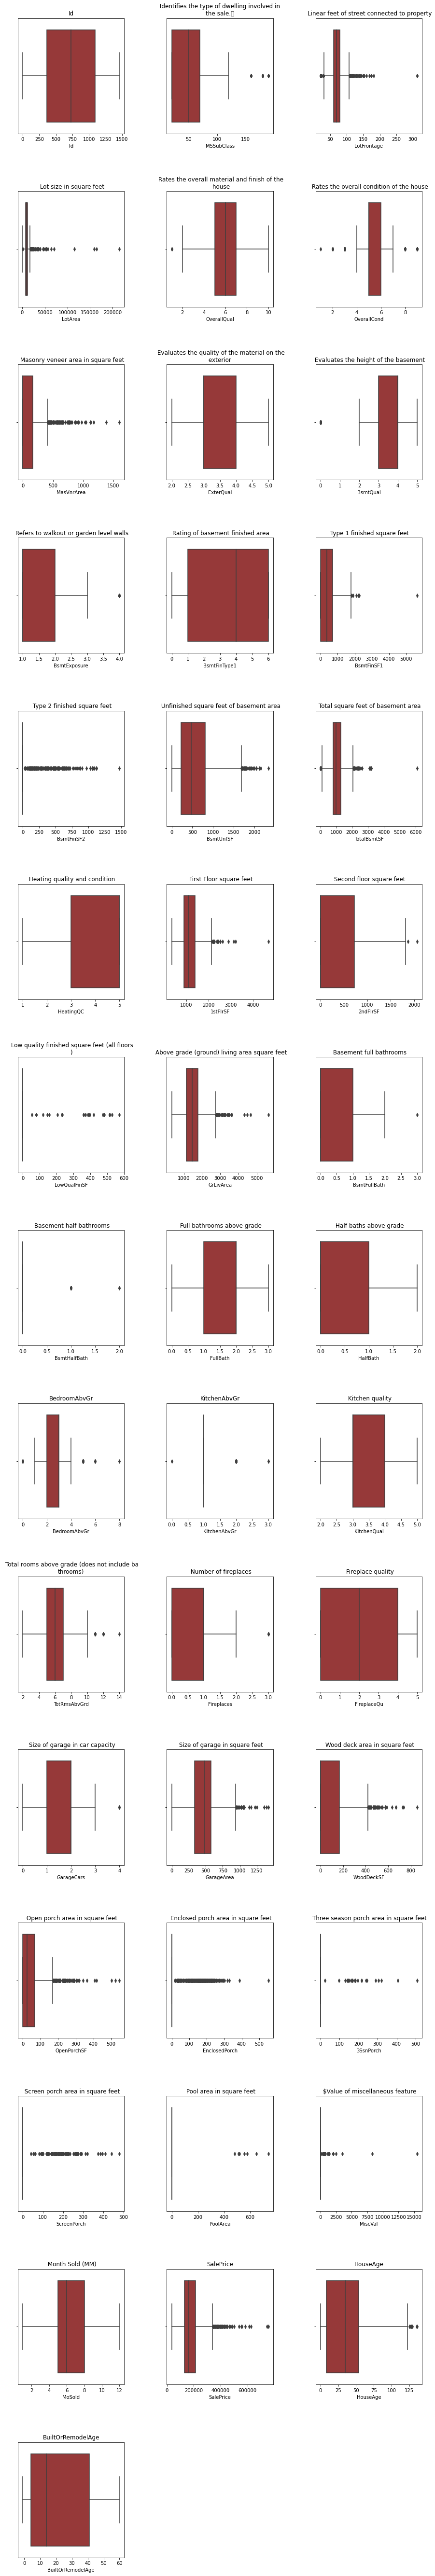

In [48]:

cols = 3
rows = 20
num_cols = housing.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.4)
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)

    sns.set_color_codes()
    #print(data_dict.get(col, col))
    ax.set_title('\n'.join(re.findall('.{1,45}', data_dict.get(col, col))))
    ax = sns.boxplot(housing[col], color="brown")
    #sns.distplot(x = housing[col],xlabel=col, ax = ax)
    
#fig.tight_layout()  
plt.show()

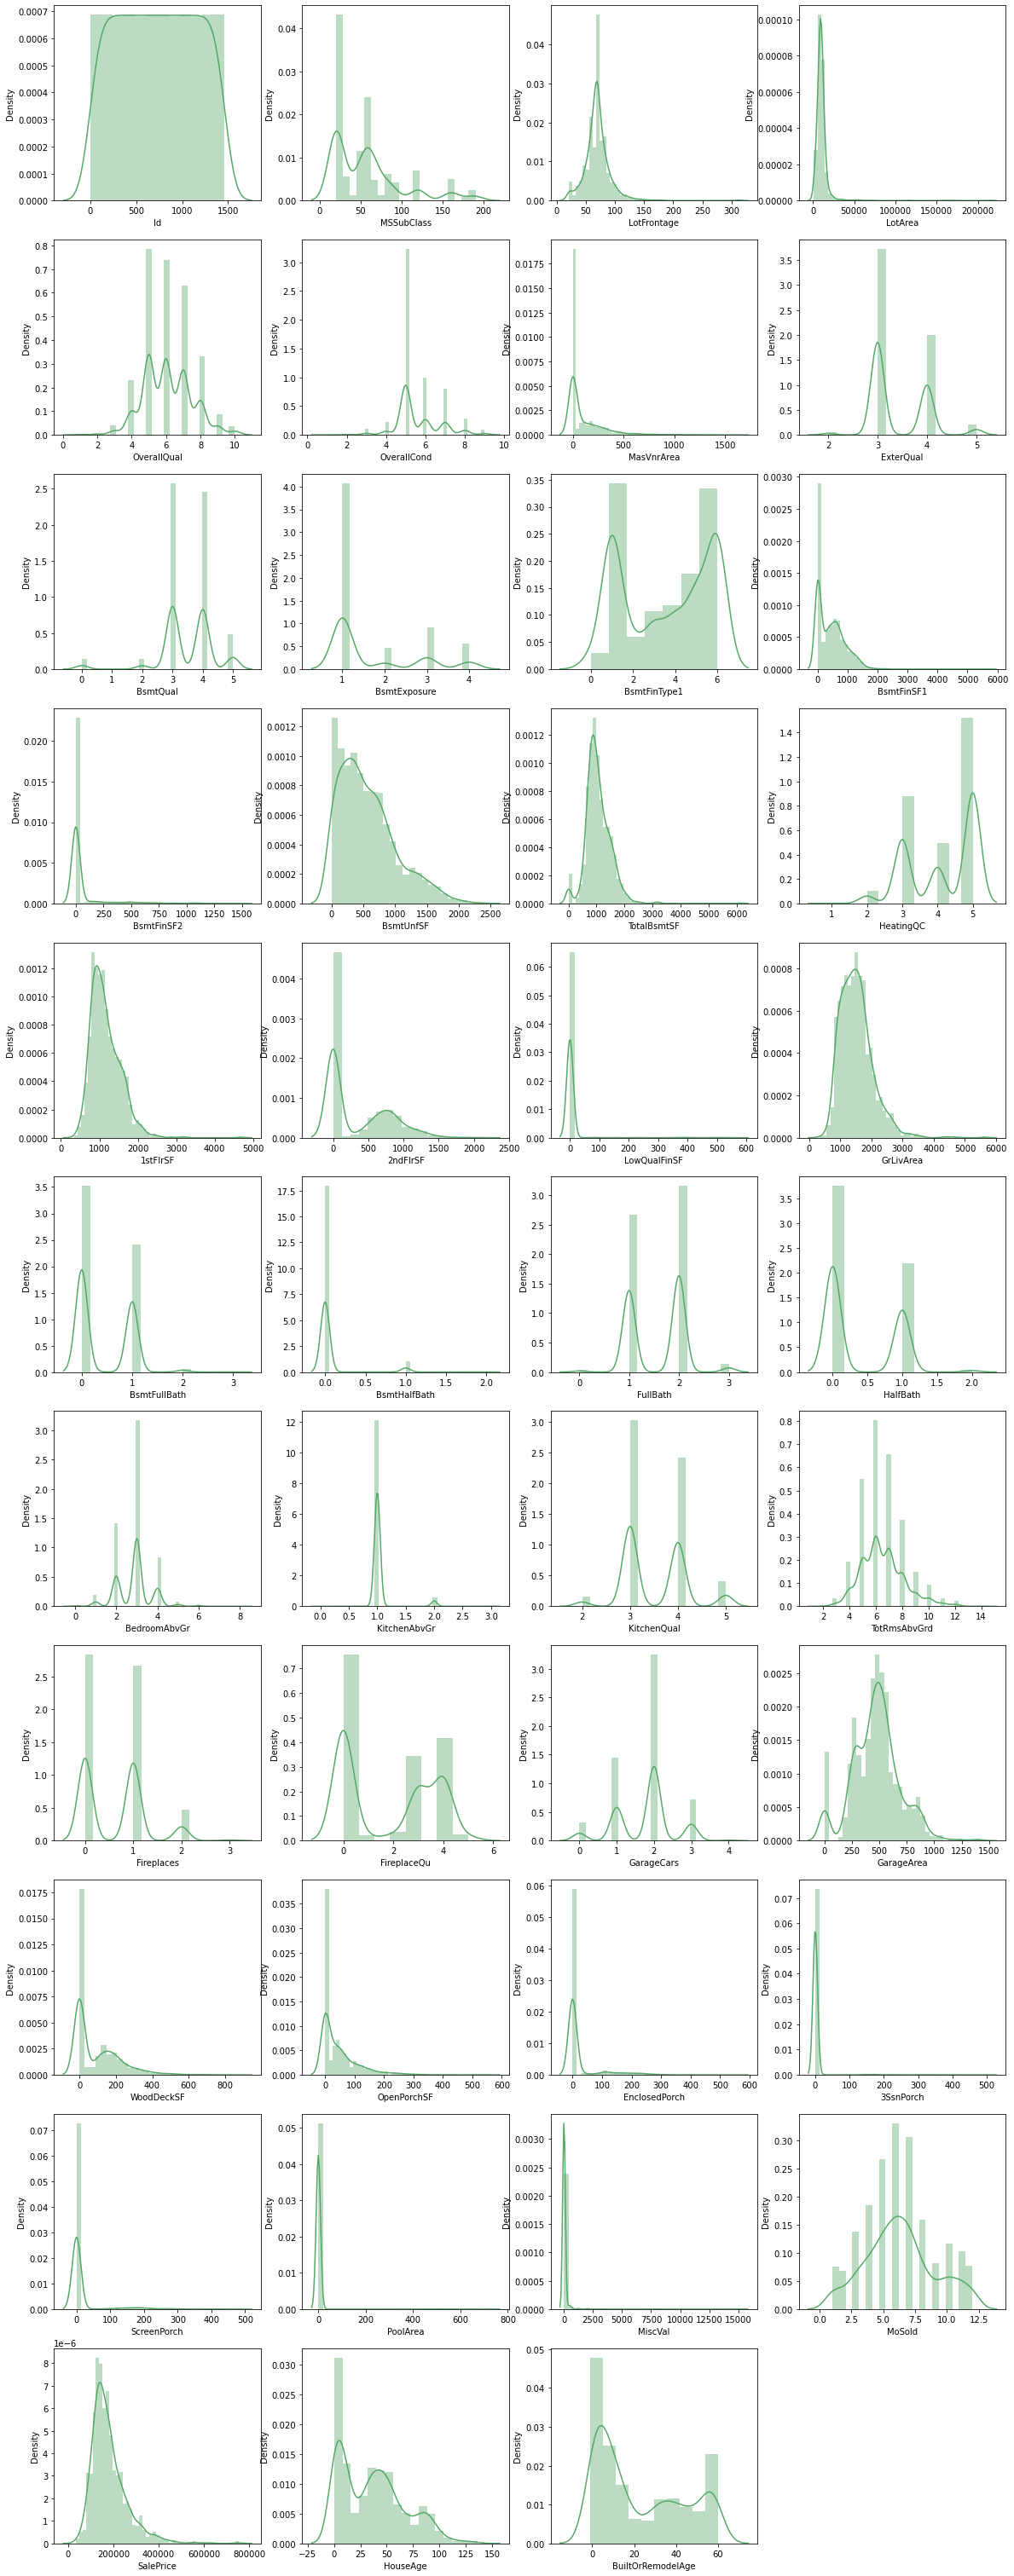

In [49]:
cols = 4
rows = 15
num_cols = housing.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)

    sns.set_color_codes()
    ax = sns.distplot(housing[col], color="g")
    #sns.distplot(x = housing[col],xlabel=col, ax = ax)
    
#fig.tight_layout()  
plt.show()

In [50]:
housing=housing.drop(columns=['Id'],axis=1)

 <font color='blue'>
    Inference :
<ul>
<li>
 Id Column has no relationship and can be dropped
        
 </li>
 <li> Discrete Columns  identified from dist plot    
        <ul>
        <li>MSSubClass</li>    
        <li>OverallQual</li>
        <li>OverallCond</li>  
                    <li>ExterQual</li>  
                    <li>BsmtQual</li>  
                    <li>BsmtExposure</li>  
                               <li>HeatingQC</li>  
                               <li>BsmtFullBath</li>  
                               <li>BsmtHalfBath</li>  
                               <li>FullBath</li>  
              <li>BedroomAbvGr</li>  
              <li>HalfBath</li>  
              <li>KitchenAbvGr</li>  
                <li>TotRmsAbvGrd</li>  
                <li>Fireplaces</li>  
                <li>FireplaceQu</li>  
                <li>GarageCars</li>  
                            <li>MoSold</li>  
        </ul>
 </li>
    
 </ul>
 </font>

In [51]:
#discrete_cols = ['OverallQual', 'OverallCond', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'HeatingQC', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'BedroomAbvGr', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageCars', 'MoSold']
discrete_df=[]
for feature in housing.select_dtypes(exclude='object').columns:
    d = {
    'Feature' : feature,  # some formula for obtaining values
    'HighestRepeatedValues' : housing[feature].value_counts().max(),
    'HighestRptdValInPercentage' : (housing[feature].value_counts().max()/housing.shape[0])*100
    }
    discrete_df.append(d)
discrete_df = pd.DataFrame(discrete_df)

In [52]:
discrete_df.sort_values(by='HighestRptdValInPercentage',ascending=False)

Feature  HighestRepeatedValues  HighestRptdValInPercentage
36           PoolArea                   1453                   99.520548
34          3SsnPorch                   1436                   98.356164
17       LowQualFinSF                   1434                   98.219178
37            MiscVal                   1408                   96.438356
24       KitchenAbvGr                   1392                   95.342466
20       BsmtHalfBath                   1378                   94.383562
35        ScreenPorch                   1344                   92.054795
11         BsmtFinSF2                   1293                   88.561644
33      EnclosedPorch                   1252                   85.753425
8        BsmtExposure                    991                   67.876712
22           HalfBath                    913                   62.534247
6           ExterQual                    906                   62.054795
5          MasVnrArea                    869                   59.520548
19       BsmtFullBath                    856                   58.630137
16           2ndFlrSF                    829                   56.780822
29         GarageCars                    824                   56.438356
4         OverallCond                    821                   56.232877
23       BedroomAbvGr                    804                   55.068493
21           FullBath                    768                   52.602740
31         WoodDeckSF                    761                   52.123288
14          HeatingQC                    741                   50.753425
25        KitchenQual                    735                   50.342466
28        FireplaceQu                    690                   47.260274
27         Fireplaces                    690                   47.260274
32        OpenPorchSF                    656                   44.931507
7            BsmtQual                    649                   44.452055
0          MSSubClass                    536                   36.712329
10         BsmtFinSF1                    467                   31.986301
9        BsmtFinType1                    430                   29.452055
26       TotRmsAbvGrd                    402                   27.534247
3         OverallQual                    397                   27.191781
1         LotFrontage                    270                   18.493151
38             MoSold                    253                   17.328767
41  BuiltOrRemodelAge                    124                    8.493151
12          BsmtUnfSF                    118                    8.082192
40           HouseAge                    100                    6.849315
30         GarageArea                     81                    5.547945
13        TotalBsmtSF                     37                    2.534247
15           1stFlrSF                     25                    1.712329
2             LotArea                     25                    1.712329
18          GrLivArea                     22                    1.506849
39          SalePrice                     20                    1.369863

 <font color='blue'><ul><li>Below features have large single values (> 85%) and can be dropped.</li><ul><li>PoolArea</li><li>3SsnPorch</li><li>LowQualFinSF</li> <li>MiscVal</li><li>KitchenAbvGr</li><li>BsmtHalfBath</li> <li>ScreenPorch</li><li>BsmtFinSF2</li><li>EnclosedPorch<li></ul></ul></font>

In [53]:
housing=housing.drop(columns=['PoolArea','3SsnPorch','LowQualFinSF', 'MiscVal','KitchenAbvGr','BsmtHalfBath', 'ScreenPorch','BsmtFinSF2','EnclosedPorch'],axis=0)

#### 5.1 Data Visualization for Numeric columns (BiVariate Analysis)

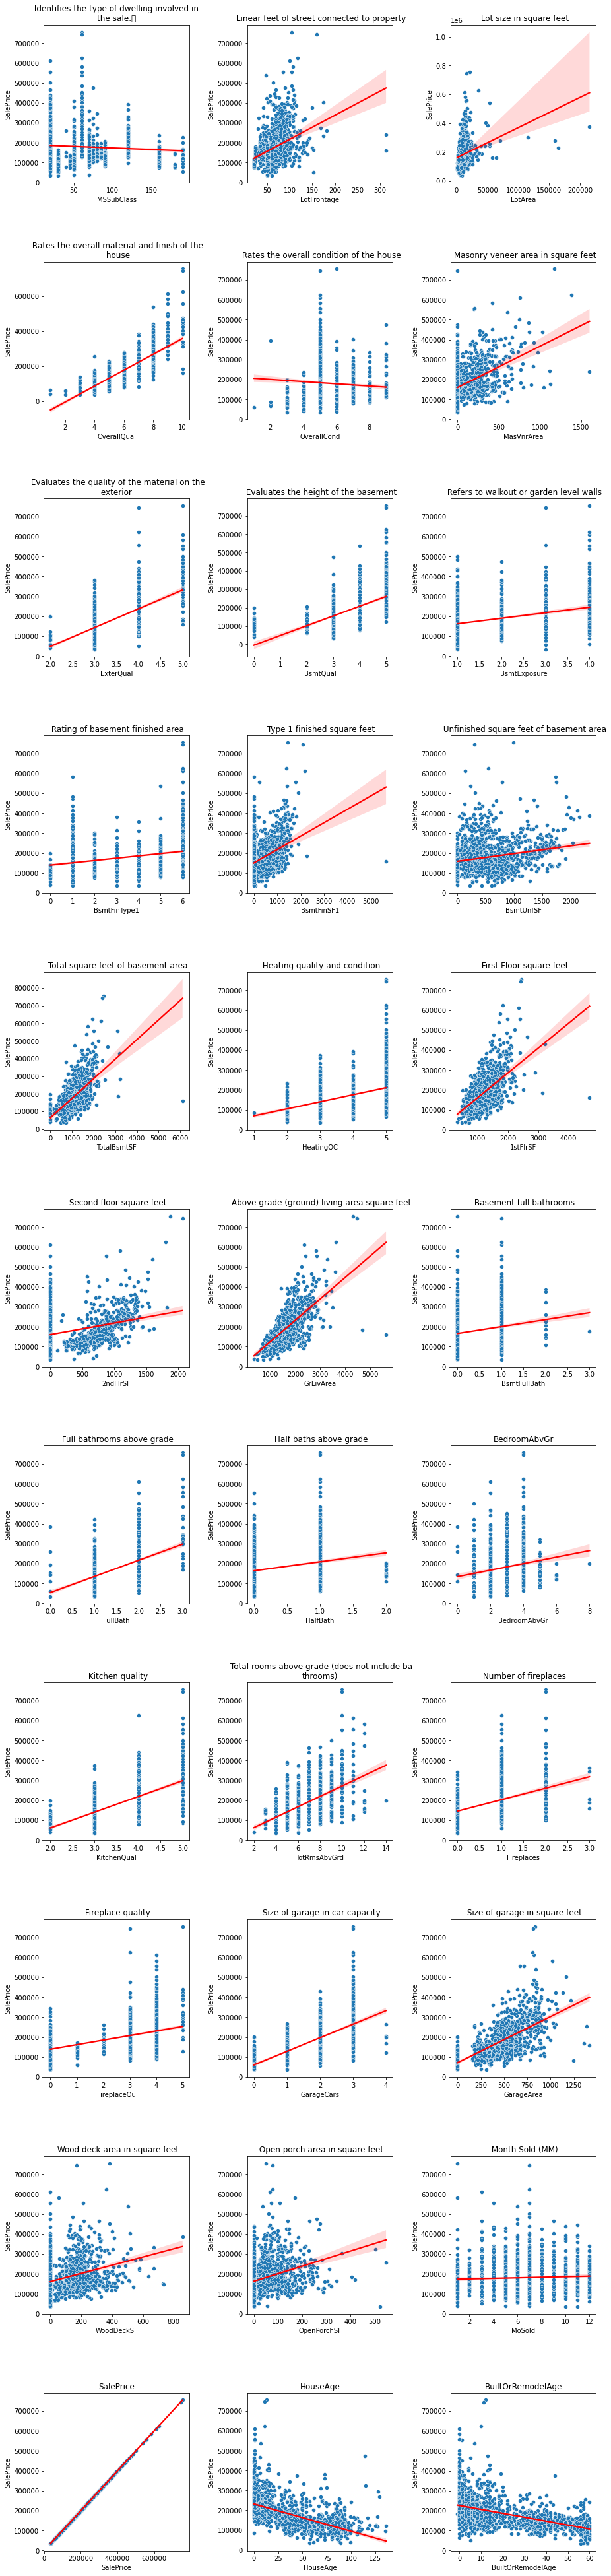

In [54]:

cols = 3
rows = 20
num_cols = housing.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.4)
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)

    sns.set_color_codes()
    #print(data_dict.get(col, col))
    ax.set_title('\n'.join(re.findall('.{1,45}', data_dict.get(col, col))))
    ax = sns.scatterplot(x=housing[col],y=housing['SalePrice'])
    ax = sns.regplot(x=housing[col],y=housing['SalePrice'],scatter=False,color="red")
    #ax = sns.jointplot(x=housing[col],y=housing['SalePrice'], kind='reg',joint_kws={'color':'red'})
                  
    #sns.distplot(x = housing[col],xlabel=col, ax = ax)
    
#fig.tight_layout()  
plt.show()

 <font color='blue'>
    Inference :
<ul>

 <li> Below Features exhibit a positive linear relationship    
        <ul>
        <li>GrLivArea</li>    
        <li>KitchenQual</li>
        <li>GarageArea</li>  
                    <li>TotalBsmtSF</li>  
                    <li>1stFlrSF</li>  
        </ul>
 </li>
     <li> Below Features exhibit a negative linear relationship    
        <ul>
        <li>BuiltOrRemodelAge   </li>    
        <li>HouseAge            </li> 
        </ul>
 </li>
 </ul>
 </font>

In [55]:
housing.select_dtypes(exclude='object').columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'MoSold', 'SalePrice', 'HouseAge', 'BuiltOrRemodelAge'],
      dtype='object')

In [56]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 67 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MSSubClass         1460 non-null   int64  
 1   MSZoning           1460 non-null   object 
 2   LotFrontage        1460 non-null   float64
 3   LotArea            1460 non-null   int64  
 4   Street             1460 non-null   object 
 5   LotShape           1460 non-null   object 
 6   LandContour        1460 non-null   object 
 7   Utilities          1460 non-null   object 
 8   LotConfig          1460 non-null   object 
 9   LandSlope          1460 non-null   object 
 10  Neighborhood       1460 non-null   object 
 11  Condition1         1460 non-null   object 
 12  Condition2         1460 non-null   object 
 13  BldgType           1460 non-null   object 
 14  HouseStyle         1460 non-null   object 
 15  OverallQual        1460 non-null   int64  
 16  OverallCond        1460 

#### 5.1 Data Visualization for Categorical columns

In [57]:
#Convert discrete columns to Object Type for Category

housing[['MSSubClass', 'OverallQual', 'OverallCond', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'HeatingQC', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'HalfBath',  'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageCars', 'MoSold']]= housing[['MSSubClass', 'OverallQual', 'OverallCond', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'HeatingQC', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'HalfBath',  'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageCars', 'MoSold']].astype('object')

In [58]:
housing.shape

(1460, 67)

In [59]:
for c in housing.columns:
    if housing[c].dtype == np.object :
        print('-'*100)
        print(c)
        print(housing[c].value_counts())

----------------------------------------------------------------------------------------------------
MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
----------------------------------------------------------------------------------------------------
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
----------------------------------------------------------------------------------------------------
Street
Pave    1454
Grvl       6
Name: Street, dtype: int64
----------------------------------------------------------------------------------------------------
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
----------------------------------------------------------------------------------------------------
LandContour
Lvl    1311
Bnk 

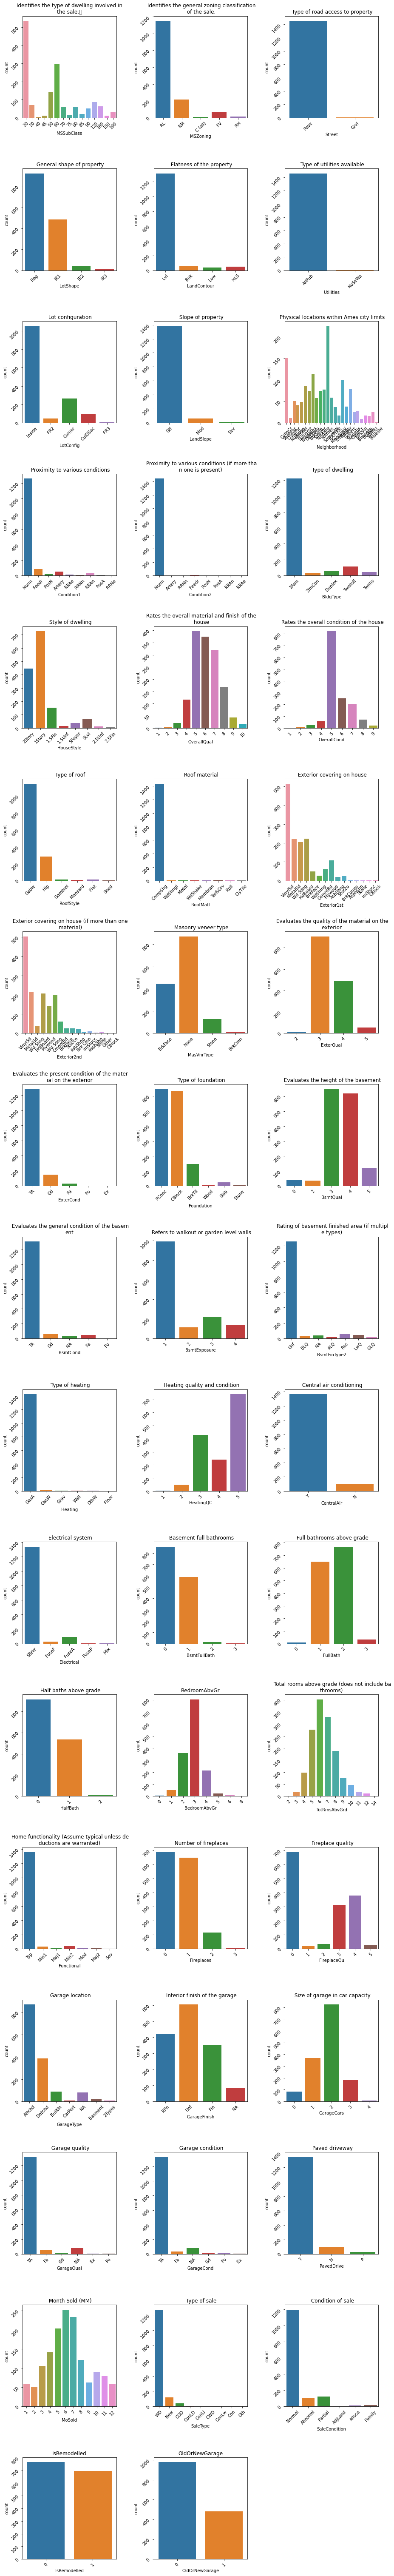

In [60]:
cols = 3
rows = 20
obj_cols = housing.select_dtypes(include='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.4)
for i, col in enumerate(obj_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    

    sns.set_color_codes()
    ax.set_title('\n'.join(re.findall('.{1,45}', data_dict.get(col, col))))
    ax.tick_params(labelrotation=45)
    ax = sns.countplot(x=col, data=housing)
    #ax = housing[col].value_counts().plot.bar()
    #ax = sns.barplot(x=col, y='SalePrice', data=housing)#" v/s SalePrice",color='red'
    #sns.distplot(x = housing[col],xlabel=col, ax = ax)
    
#fig.tight_layout()  
plt.show()

<ul>
<font color='blue'>
<li>Below categorical features have larger  dominating  values </li>
<ul>
<li>Street</li>
<li>LandContour</li>
<li>Utilities</li>
<li>LandSlope</li>
<li>Condition1</li>
<li>Condition2</li>
<li>RoofMatl</li>
<li>ExterCond</li>
<li>BsmtCond</li>
<li>BsmtFinType2</li>
<li>Heating</li>
<li>CentralAir</li>
<li>Electrical</li>
<li>Functional</li>
<li>GarageQual</li>
<li>GarageCond</li>
<li>PavedDrive</li>
<li>SaleType</li>
</ul>
</font>
</ul>

#### 5.2 Data Visualization for Category columns (BiVariate Analysis)

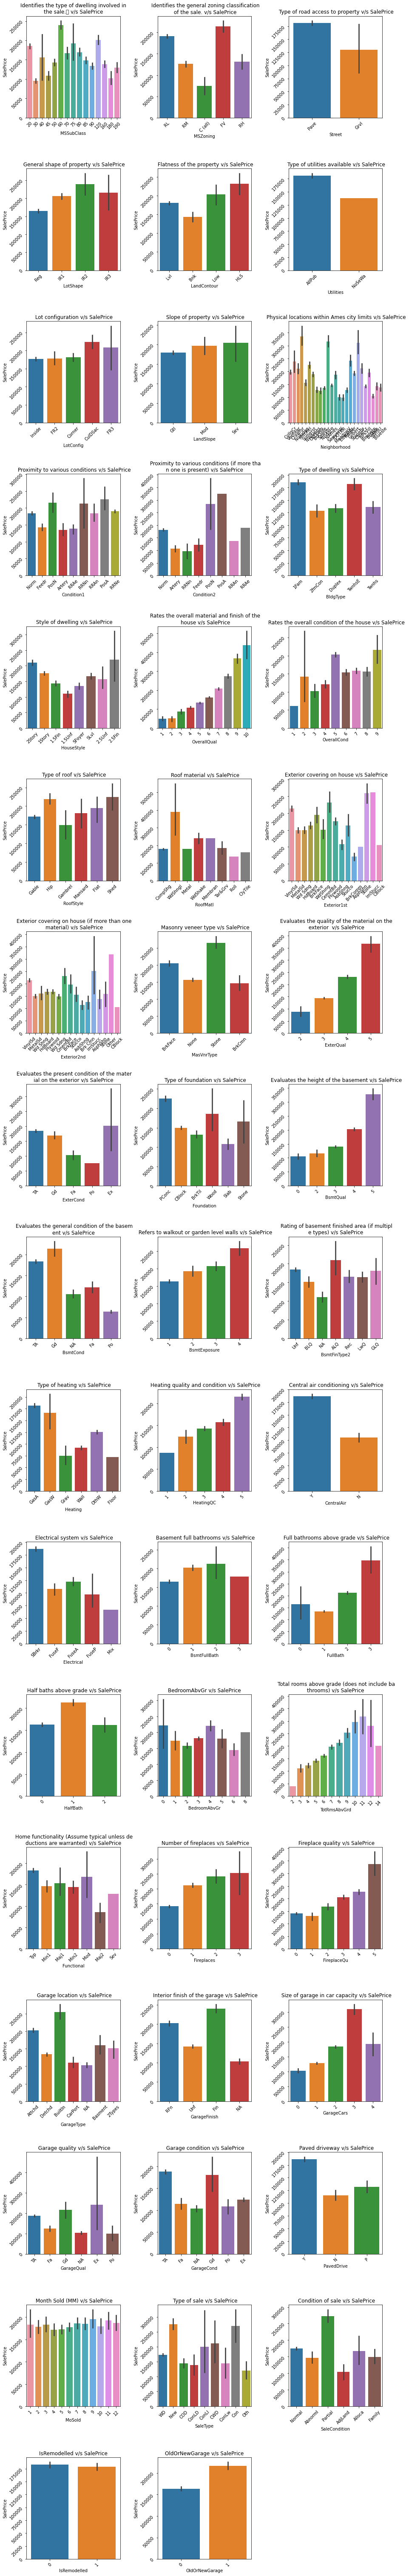

In [61]:

cols = 3
rows = 20
obj_cols = housing.select_dtypes(include='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.4)
for i, col in enumerate(obj_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    

    sns.set_color_codes()
    ax.set_title('\n'.join(re.findall('.{1,45}', data_dict.get(col, col)))+" v/s SalePrice")
    ax.tick_params(labelrotation=45)
    ax = sns.barplot(x=col, y='SalePrice', data=housing)#" v/s SalePrice",color='red'
    #sns.distplot(x = housing[col],xlabel=col, ax = ax)
    
#fig.tight_layout()  
plt.show()

##### Box Plot Category Visualization 

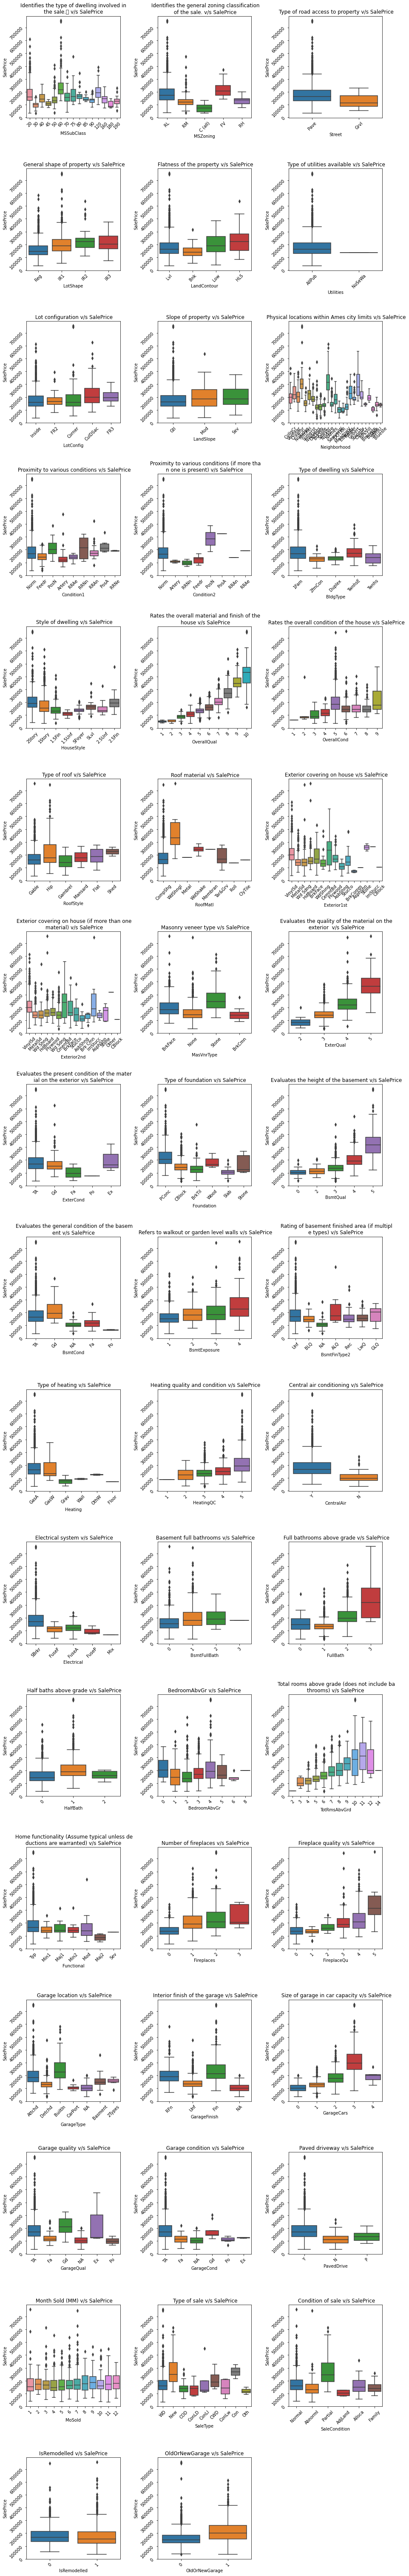

In [62]:

cols = 3
rows = 20
obj_cols = housing.select_dtypes(include='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.4)
for i, col in enumerate(obj_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    

    sns.set_color_codes()
    ax.set_title('\n'.join(re.findall('.{1,45}', data_dict.get(col, col)))+" v/s SalePrice")
    ax.tick_params(labelrotation=45)
    ax = sns.boxplot(x=col, y='SalePrice', data=housing)#" v/s SalePrice",color='red'
    #sns.distplot(x = housing[col],xlabel=col, ax = ax)
    
#fig.tight_layout()  
plt.show()

##### Observations



Following are the observations from the plots.
<ul>
<font color="blue">
<li>'OverallQual' : More the rating of this feature, more the SalePrice (target variable)</li>
<li>'OverallCond' : SalePrice is highest for rating 5</li>
<li>'MoSold' : SalePrice does not show a strong trend depending on month and year on which realty is sold</li>
<li>'FullBath' = 3 and 'HalfBath' = 1 have highest SalePrice </li>
<li>'TotRmsAbvGrd' : More the number of total rooms (until 11 rooms) above grade more the Sale Price</li>
<li>'BsmtFullBath' : Need further inspection for meaningful insight</li>
<li>'LotShape' : Slightly irregular LotShape have the highest SalePrice</li>
<li>'Utilities' : Most of the houses in the dataset have all the public utilities</li>
<li>'ExterQual' : Houses with Excellent quality of material on the exterior have the highest SalePrice</li>
<li>'ExterCond' : Houses with Excellent condition of material on the exterior have the highest SalePrice</li>
<li>Houses having excellent heating quality and kitchen quality have the highest SalePrice</li>
<li>Houses with typical functionality have highest SalePrice. There are very few houses that are severely damaged.</li>
<li>SalePrice range in largest for houses with average fireplace quality.</li>
<li>SalePrice is highest where garage is finished.</li>
<li>The range of SalePrice is widest for Typical/Average Garage quality and condition.</li>
<li>There are very few houses with excellect condition of garage.</li>
<li>Houses with excellent quality basement have the highest SalePrice</li>
<li>A lot of houses have unfinished basment or no basement (label = Not_applicable)</li>
</font>
</ul>


#### Correlation HeatMap 

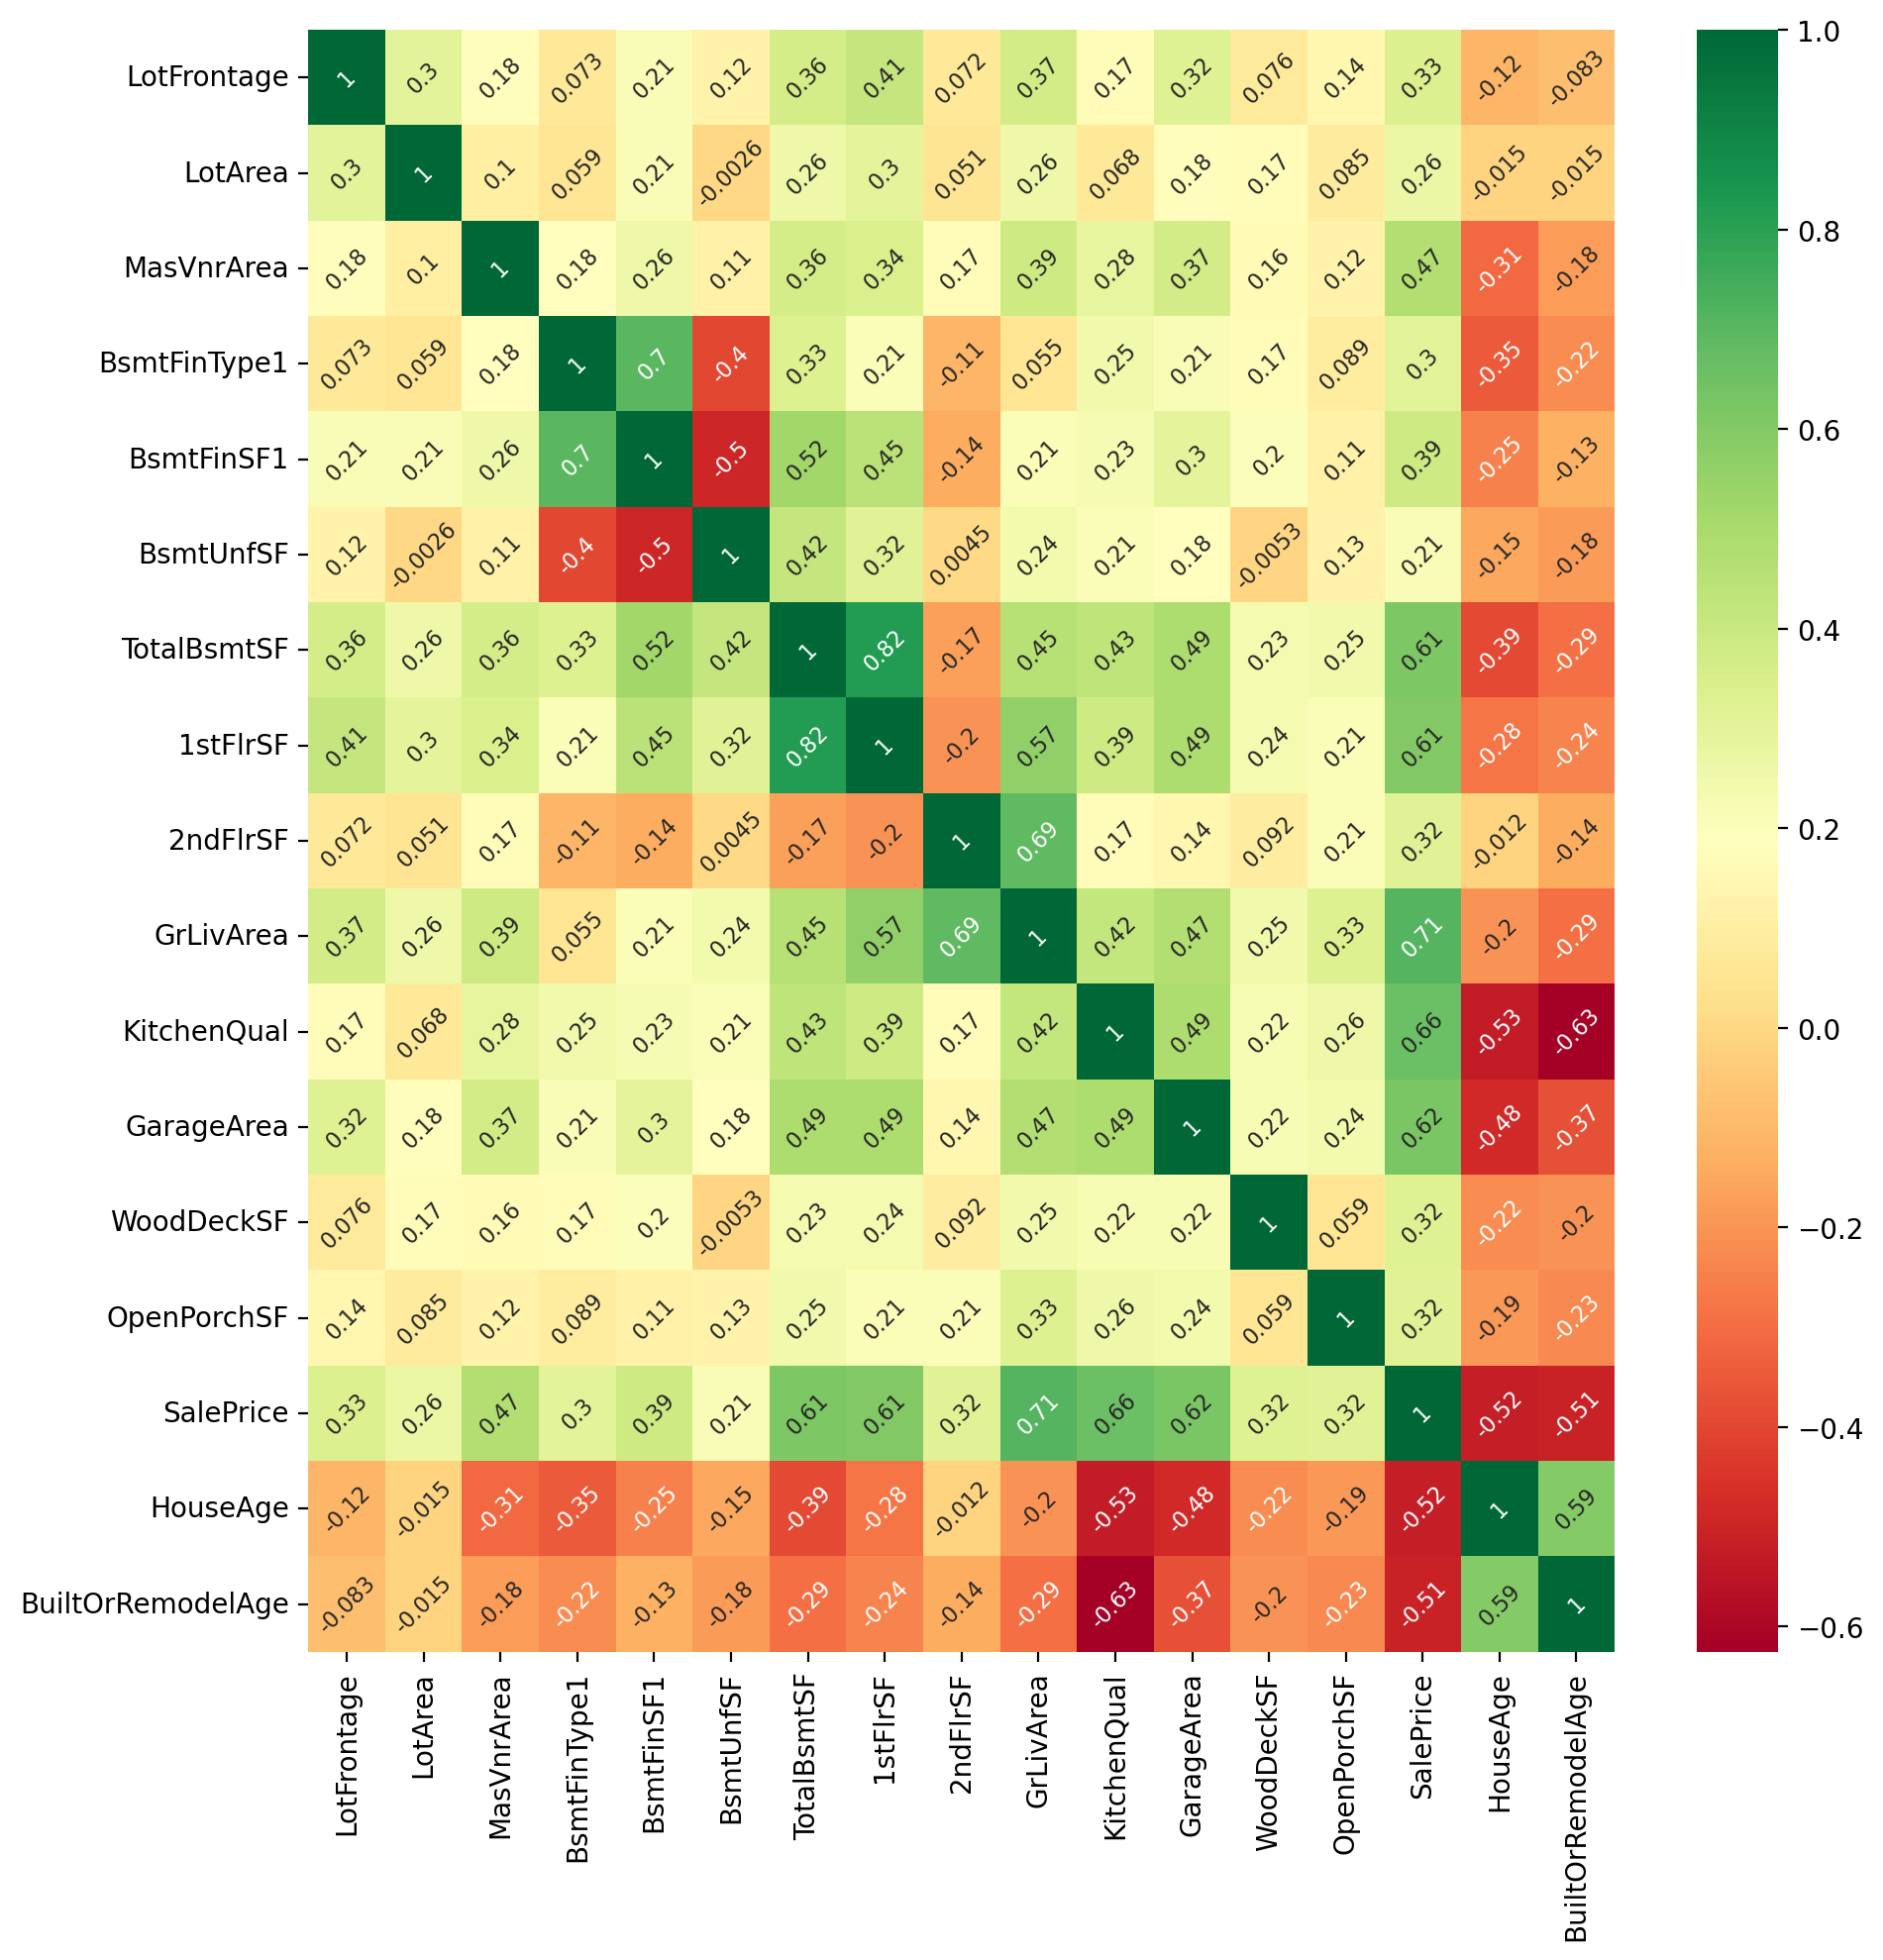

In [63]:

plt.figure(figsize=(10,10),dpi=200)
sns.heatmap(housing.corr(),cmap="RdYlGn",annot=True,annot_kws={'size': 8, 'rotation': 45})
#sns.heatmap(housing.corr(),cmap="RdYlGn_r")

plt.tight_layout()

In [64]:

# Lets take top and bottom correlation values w.r.t SalePrice and do our analysis

corrmat = housing.corr()
larger_corr = corrmat.sort_values('SalePrice', ascending=False).head(10)['SalePrice'].index
smaller_corr = corrmat.sort_values('SalePrice', ascending=True).head(10)['SalePrice'].index



<AxesSubplot:>

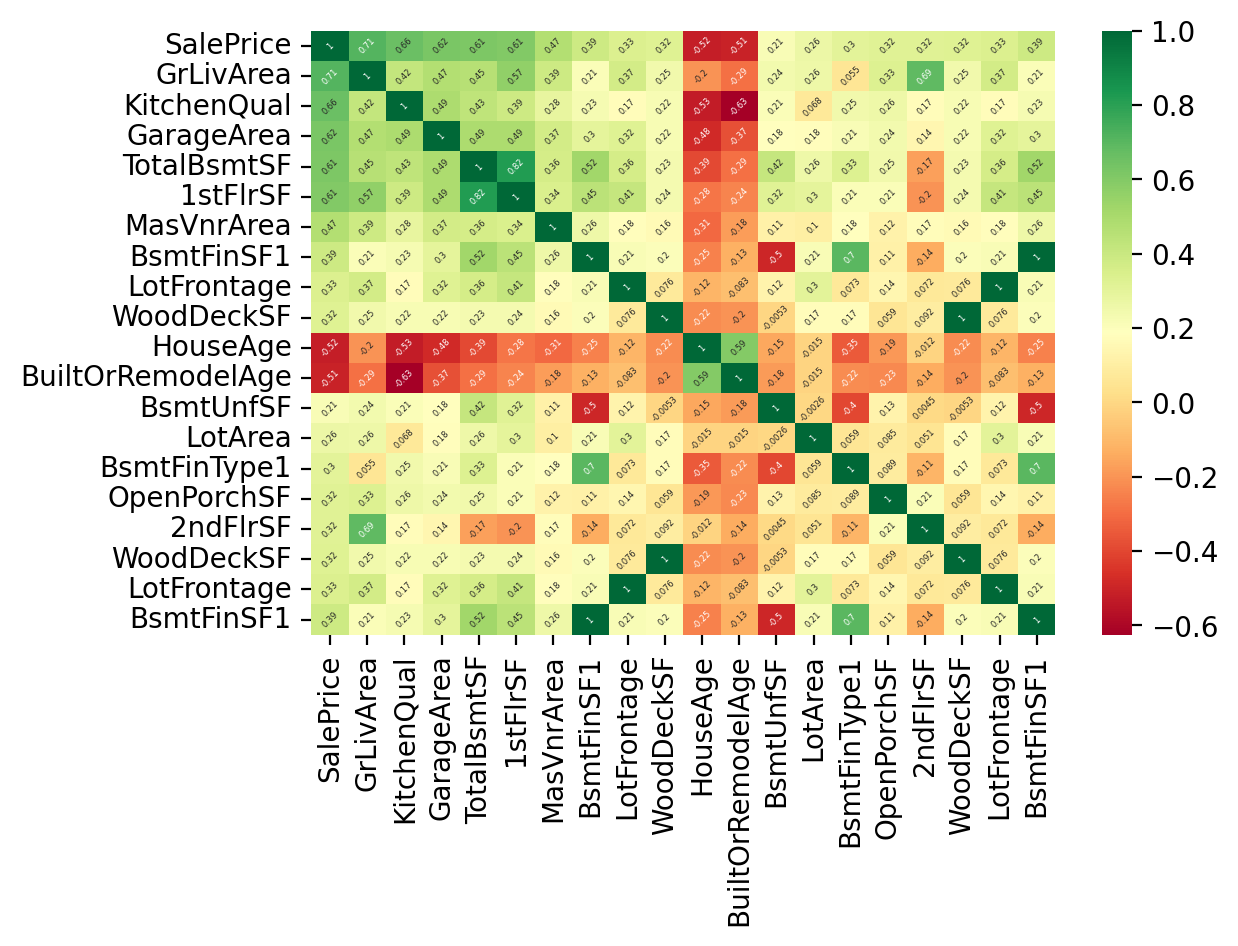

In [65]:
combined_corr = np.append(larger_corr,smaller_corr)
plt.figure(dpi=200)
sns.heatmap(housing[combined_corr].corr(),cmap="RdYlGn",annot=True,annot_kws={'size': 3, 'rotation': 45})

In [66]:
corrmat[corrmat['SalePrice']<0.1]['SalePrice'].sort_values()

HouseAge            -0.523350
BuiltOrRemodelAge   -0.509079
Name: SalePrice, dtype: float64

In [67]:
combined_corr

array(['SalePrice', 'GrLivArea', 'KitchenQual', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'MasVnrArea', 'BsmtFinSF1',
       'LotFrontage', 'WoodDeckSF', 'HouseAge', 'BuiltOrRemodelAge',
       'BsmtUnfSF', 'LotArea', 'BsmtFinType1', 'OpenPorchSF', '2ndFlrSF',
       'WoodDeckSF', 'LotFrontage', 'BsmtFinSF1'], dtype=object)

**Observation:**

<ul>
<font color='blue'>
<li>TotalBsmtSF' & '1stFlrSF' are positively correlated, which indicates when 1stFlr is present Total square feet of basement area increases</li>
<li>Sale Price increases with GrLivArea (Above ground living area excluding Basement), which indicates GrLivArea takes precedence in determining Sale price rather than Basement Area </li>
<li>Sale Price increases with KitchenQual (Kitchen quality).</li>
<li>Sale Price increases with GarageArea (Size of garage)</li>
<li>Sale Price decreases with HouseAge  </li>
<li>Sale Price decreases with BuiltOrRemodelAge </li>
</font>
</ul>    


#### Data Prepartion

**Encoding For Categorical Variables**
**Ordered Features -- to be label encoded**
'LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu', 'GarageFinish', 'GarageQual',
'GarageCond', 'CentralAir'

**Unordered Features -- to be one hot encoded**
'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 
'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition'

In [68]:
unordered_features = ['MSZoning', 'Street', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 
'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'SaleType','SaleCondition']

In [69]:
house_categorical = housing.select_dtypes(include=['object'])
house_categorical.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       'MoSold', 'SaleType', 'SaleCondition', 'IsRemodelled',
       'OldOrNewGarage'],
      dtype='object')

In [70]:
dummy_combined = np.unique(np.append(house_categorical.columns,unordered_features))

In [71]:
len(dummy_combined)

50

#### Encoding Categorical Variables

In [72]:
housing.shape

(1460, 67)

In [73]:
housing['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [74]:
dummy_df = pd.get_dummies(housing[dummy_combined], drop_first=True)

In [75]:
dummy_df.shape

(1460, 277)

In [76]:
[print(x) for x in dummy_df.columns] 

BedroomAbvGr_1
BedroomAbvGr_2
BedroomAbvGr_3
BedroomAbvGr_4
BedroomAbvGr_5
BedroomAbvGr_6
BedroomAbvGr_8
BldgType_2fmCon
BldgType_Duplex
BldgType_Twnhs
BldgType_TwnhsE
BsmtCond_Gd
BsmtCond_NA
BsmtCond_Po
BsmtCond_TA
BsmtExposure_2
BsmtExposure_3
BsmtExposure_4
BsmtFinType2_BLQ
BsmtFinType2_GLQ
BsmtFinType2_LwQ
BsmtFinType2_NA
BsmtFinType2_Rec
BsmtFinType2_Unf
BsmtFullBath_1
BsmtFullBath_2
BsmtFullBath_3
BsmtQual_2
BsmtQual_3
BsmtQual_4
BsmtQual_5
CentralAir_Y
Condition1_Feedr
Condition1_Norm
Condition1_PosA
Condition1_PosN
Condition1_RRAe
Condition1_RRAn
Condition1_RRNe
Condition1_RRNn
Condition2_Feedr
Condition2_Norm
Condition2_PosA
Condition2_PosN
Condition2_RRAe
Condition2_RRAn
Condition2_RRNn
Electrical_FuseF
Electrical_FuseP
Electrical_Mix
Electrical_SBrkr
ExterCond_Fa
ExterCond_Gd
ExterCond_Po
ExterCond_TA
ExterQual_3
ExterQual_4
ExterQual_5
Exterior1st_AsphShn
Exterior1st_BrkComm
Exterior1st_BrkFace
Exterior1st_CBlock
Exterior1st_CemntBd
Exterior1st_HdBoard
Exterior1st_ImStucc
E

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

**Comment:**

- Adding 277 features to the existing dataset will make the model very complex.
- From the above boxplots, for some categorical features only label is dominating over others.
- In dummy_df any label having same value in 95% or more rows will be dropped, as those new features are highly imbalance

In [77]:
#discrete_cols = ['OverallQual', 'OverallCond', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'HeatingQC', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'BedroomAbvGr', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageCars', 'MoSold']
discrete_df=[]
for feature in dummy_df.columns:
    d = {
    'Feature' : feature,  # some formula for obtaining values
    'HighestRepeatedValues' : dummy_df[feature].value_counts()[0],
    'HighestRptdValInPercentage' : (dummy_df[feature].value_counts()[0]/dummy_df.shape[0])*100
    }
    discrete_df.append(d)
discrete_df = pd.DataFrame(discrete_df)
discrete_df.sort_values(by='HighestRptdValInPercentage',ascending=False)

Feature  HighestRepeatedValues  HighestRptdValInPercentage
276   Utilities_NoSeWa                   1459                   99.931507
80   Exterior2nd_Other                   1459                   99.931507
44     Condition2_RRAe                   1459                   99.931507
45     Condition2_RRAn                   1459                   99.931507
49      Electrical_Mix                   1459                   99.931507
..                 ...                    ...                         ...
31        CentralAir_Y                     95                    6.506849
134       Heating_GasA                     32                    2.191781
239   RoofMatl_CompShg                     26                    1.780822
41     Condition2_Norm                     15                    1.027397
264        Street_Pave                      6                    0.410959

[277 rows x 3 columns]

In [78]:
#- In dummy_df any label having same value in 95% or more rows will be dropped, as those new features are highly imbalanced.
dummies_to_drop = discrete_df[discrete_df['HighestRptdValInPercentage']>95]['Feature']
[print(x) for x in dummies_to_drop]

BedroomAbvGr_1
BedroomAbvGr_5
BedroomAbvGr_6
BedroomAbvGr_8
BldgType_2fmCon
BldgType_Duplex
BldgType_Twnhs
BsmtCond_Gd
BsmtCond_NA
BsmtCond_Po
BsmtFinType2_BLQ
BsmtFinType2_GLQ
BsmtFinType2_LwQ
BsmtFinType2_NA
BsmtFinType2_Rec
BsmtFullBath_2
BsmtFullBath_3
BsmtQual_2
Condition1_PosA
Condition1_PosN
Condition1_RRAe
Condition1_RRAn
Condition1_RRNe
Condition1_RRNn
Condition2_Feedr
Condition2_PosA
Condition2_PosN
Condition2_RRAe
Condition2_RRAn
Condition2_RRNn
Electrical_FuseF
Electrical_FuseP
Electrical_Mix
ExterCond_Fa
ExterCond_Po
ExterQual_5
Exterior1st_AsphShn
Exterior1st_BrkComm
Exterior1st_BrkFace
Exterior1st_CBlock
Exterior1st_CemntBd
Exterior1st_ImStucc
Exterior1st_Stone
Exterior1st_Stucco
Exterior1st_WdShing
Exterior2nd_AsphShn
Exterior2nd_Brk Cmn
Exterior2nd_BrkFace
Exterior2nd_CBlock
Exterior2nd_CmentBd
Exterior2nd_ImStucc
Exterior2nd_Other
Exterior2nd_Stone
Exterior2nd_Stucco
Exterior2nd_Wd Shng
FireplaceQu_1
FireplaceQu_2
FireplaceQu_5
Fireplaces_3
Foundation_Slab
Foundation_

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [79]:
dummy_df = dummy_df.drop(dummies_to_drop, axis=1)
print(dummy_df.shape)

(1460, 116)


In [80]:
# Adding the dummy variables to the original dataframe
housing = pd.concat([housing,dummy_df],axis=1)

# Dropping the redundant columns
housing = housing.drop(dummy_combined,axis=1)

In [81]:
[print(i) for i in housing.columns ]

LotFrontage
LotArea
MasVnrArea
BsmtFinType1
BsmtFinSF1
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
GrLivArea
KitchenQual
GarageArea
WoodDeckSF
OpenPorchSF
SalePrice
HouseAge
BuiltOrRemodelAge
BedroomAbvGr_2
BedroomAbvGr_3
BedroomAbvGr_4
BldgType_TwnhsE
BsmtCond_TA
BsmtExposure_2
BsmtExposure_3
BsmtExposure_4
BsmtFinType2_Unf
BsmtFullBath_1
BsmtQual_3
BsmtQual_4
BsmtQual_5
CentralAir_Y
Condition1_Feedr
Condition1_Norm
Condition2_Norm
Electrical_SBrkr
ExterCond_Gd
ExterCond_TA
ExterQual_3
ExterQual_4
Exterior1st_HdBoard
Exterior1st_MetalSd
Exterior1st_Plywood
Exterior1st_VinylSd
Exterior1st_Wd Sdng
Exterior2nd_HdBoard
Exterior2nd_MetalSd
Exterior2nd_Plywood
Exterior2nd_VinylSd
Exterior2nd_Wd Sdng
FireplaceQu_3
FireplaceQu_4
Fireplaces_1
Fireplaces_2
Foundation_CBlock
Foundation_PConc
FullBath_1
FullBath_2
Functional_Typ
GarageCars_1
GarageCars_2
GarageCars_3
GarageCond_NA
GarageCond_TA
GarageFinish_NA
GarageFinish_RFn
GarageFinish_Unf
GarageQual_NA
GarageQual_TA
GarageType_Attchd
GarageType_

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

### Data Prepartion & Transformation 

In [82]:
# split into X and y

X = housing.drop(['SalePrice'], axis=1)
y = housing['SalePrice'] 
X.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinType1  BsmtFinSF1  BsmtUnfSF  \
0         65.0     8450       196.0             6         706        150   
1         80.0     9600         0.0             5         978        284   
2         68.0    11250       162.0             6         486        434   
3         60.0     9550         0.0             5         216        540   
4         84.0    14260       350.0             6         655        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  ...  SaleCondition_Partial  \
0          856       856       854       1710  ...                      0   
1         1262      1262         0       1262  ...                      0   
2          920       920       866       1786  ...                      0   
3          756       961       756       1717  ...                      0   
4         1145      1145      1053       2198  ...                      0   

   SaleType_New  SaleType_WD  Street_Pave  TotRmsAbvGrd_4  TotRmsAbvGrd_5  \
0             0            1            1               0               0   
1             0            1            1               0               0   
2             0            1            1               0               0   
3             0            1            1               0               0   
4             0            1            1               0               0   

   TotRmsAbvGrd_6  TotRmsAbvGrd_7  TotRmsAbvGrd_8  TotRmsAbvGrd_9  
0               0               0               1               0  
1               1               0               0               0  
2               1               0               0               0  
3               0               1               0               0  
4               0               0               0               1  

[5 rows x 132 columns]

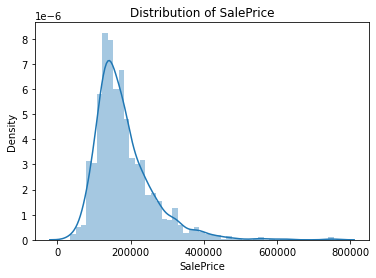

In [83]:

plt.title('Distribution of SalePrice')
sns.distplot(housing['SalePrice'])
plt.show()

**Comment:** Since SalePrice is highly right skewed,  checking the distribution of transformed SalePrice. 

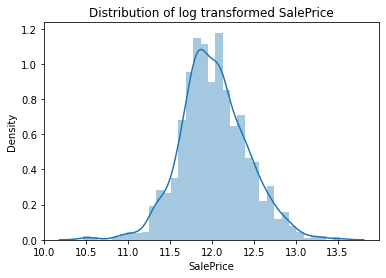

In [84]:
sns.distplot(np.log(housing['SalePrice']))
plt.title('Distribution of log transformed SalePrice')
plt.show()

In [85]:
# log transformed SalePrice is normally distributed, hence transformed data will be used for model building

y = np.log(housing['SalePrice'])
print(y)

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64


### Train Test Split 

In [86]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [87]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 132)
(292, 132)
(1168,)
(292,)


In [88]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 132)
(292, 132)
(1168,)
(292,)


### Feature Scaling

In [89]:
X_train.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinType1  BsmtFinSF1  BsmtUnfSF  \
133          69.0     6853       136.0             6        1005        262   
290         120.0    15611         0.0             1           0       1079   
24           69.0     8246         0.0             3         188        204   
1093         71.0     9230       166.0             6         661        203   
1288         40.0     5664         0.0             6        1158        343   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  ...  SaleCondition_Partial  \
133          1267      1296         0       1296  ...                      0   
290          1079      1079       840       1919  ...                      1   
24           1060      1060         0       1060  ...                      0   
1093          864      1200         0       1200  ...                      0   
1288         1501      1659         0       1659  ...                      0   

      SaleType_New  SaleType_WD  Street_Pave  TotRmsAbvGrd_4  TotRmsAbvGrd_5  \
133              0            1            1               0               0   
290              1            0            1               0               0   
24               0            1            1               0               0   
1093             0            1            1               0               0   
1288             0            1            1               0               1   

      TotRmsAbvGrd_6  TotRmsAbvGrd_7  TotRmsAbvGrd_8  TotRmsAbvGrd_9  
133                1               0               0               0  
290                0               0               1               0  
24                 1               0               0               0  
1093               1               0               0               0  
1288               0               0               0               0  

[5 rows x 132 columns]

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [91]:
X_tr_scaled = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns)
X_te_scaled = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns)

In [92]:
# Checking the features after 

print(X_tr_scaled.head()) # train data
print(X_te_scaled) # test data

   LotFrontage   LotArea  MasVnrArea  BsmtFinType1  BsmtFinSF1  BsmtUnfSF  \
0    -0.035224 -0.368268    0.177349      1.148813    1.194627  -0.673762   
1     2.314441  0.522089   -0.563579     -1.221045   -0.973738   1.158214   
2    -0.035224 -0.226653   -0.563579     -0.273102   -0.568113  -0.803816   
3     0.056919 -0.126617    0.340789      1.148813    0.452421  -0.806059   
4    -1.371308 -0.489144   -0.563579      1.148813    1.524737  -0.492134   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  ...  SaleCondition_Partial  \
0     0.453749  0.322470 -0.793198  -0.428561  ...              -0.294129   
1     0.037033 -0.227488  1.131227   0.758017  ...               3.399873   
2    -0.005082 -0.275641 -0.793198  -0.878051  ...              -0.294129   
3    -0.439531  0.079171 -0.793198  -0.611404  ...              -0.294129   
4     0.972428  1.242446 -0.793198   0.262816  ...              -0.294129   

   SaleType_New  SaleType_WD  Street_Pave  TotRmsAbvGrd_4  TotRmsAbvGrd_5 

In [93]:
### Initial Feature Selection with RFE

# Given the number of features = n, the functions prints and returns top n features selected by RFE

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE


def top_n_features(n):
    top_n_cols = []
    
    linear_m = LinearRegression()
    linear_m.fit(X_tr_scaled, y_train)
    rfe = RFE(linear_m, n)
    rfe = rfe.fit(X_tr_scaled, y_train)    
    print("Top %d features : " %n)
    rfe_ranking = list(zip(X_tr_scaled.columns,rfe.support_,rfe.ranking_))
    print(pd.DataFrame(rfe_ranking))
    for i in rfe_ranking:
        if i[1]:
            top_n_cols.append(i[0])
    #print(top_n_cols)
    return top_n_cols

In [94]:
# Checking top 45, 50 and 55 features
top_45 = top_n_features(45)
top_50 = top_n_features(50)
top_55 = top_n_features(55)

Top 45 features : 
                  0      1   2
0       LotFrontage  False  41
1           LotArea  False   5
2        MasVnrArea  False  79
3      BsmtFinType1   True   1
4        BsmtFinSF1   True   1
..              ...    ...  ..
127  TotRmsAbvGrd_5  False  78
128  TotRmsAbvGrd_6  False  23
129  TotRmsAbvGrd_7  False  24
130  TotRmsAbvGrd_8  False  25
131  TotRmsAbvGrd_9  False  26

[132 rows x 3 columns]
Top 50 features : 
                  0      1   2
0       LotFrontage  False  36
1           LotArea   True   1
2        MasVnrArea  False  74
3      BsmtFinType1   True   1
4        BsmtFinSF1   True   1
..              ...    ...  ..
127  TotRmsAbvGrd_5  False  73
128  TotRmsAbvGrd_6  False  18
129  TotRmsAbvGrd_7  False  19
130  TotRmsAbvGrd_8  False  20
131  TotRmsAbvGrd_9  False  21

[132 rows x 3 columns]
Top 55 features : 
                  0      1   2
0       LotFrontage  False  31
1           LotArea   True   1
2        MasVnrArea  False  69
3      BsmtFinType1   True 

In [95]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Given the training data and list of features, this will provide the statistical summary of the model
# This will be used to check adjusted R-square value for top 45, 50 and 55 features

def build_regressor(X_train,y_train,cols):
    X_train_ols = sm.add_constant(X_train[cols])
    lin_reg = sm.OLS(y_train.values.reshape(-1,1), X_train_ols).fit()
    print(lin_reg.summary())
    return lin_reg

In [96]:
build_regressor(X_tr_scaled,y_train,top_45)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     179.4
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        22:40:47   Log-Likelihood:                 643.25
No. Observations:                1168   AIC:                            -1196.
Df Residuals:                    1123   BIC:                            -968.7
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.02

In [97]:
lm_50 = build_regressor(X_tr_scaled,y_train,top_50)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     167.7
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        22:40:47   Log-Likelihood:                 654.88
No. Observations:                1168   AIC:                            -1212.
Df Residuals:                    1119   BIC:                            -963.7
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.02

In [98]:
build_regressor(X_tr_scaled,y_train,top_55)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     159.6
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        22:40:47   Log-Likelihood:                 662.22
No. Observations:                1168   AIC:                            -1220.
Df Residuals:                    1116   BIC:                            -957.2
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.02

**Comment:** By inspecting adjusted R-square value of linear regression model with top 45, top 50 and top 55 features, top 50 features seem to be optimum as models with 50 and 55 features have the same adjusted R-squared value on the training data.

#### Iterate the model based on p-value and VIF

In [99]:
### Check p Values and VIF for top 50 features

lm_50.pvalues[round(lm_50.pvalues,4) > 0.05].sort_values(ascending=False)

Exterior1st_VinylSd    0.131670
ExterQual_4            0.108213
Exterior2nd_VinylSd    0.050198
dtype: float64

In [100]:
# Remove GrLivArea from top_50
top_50.remove('Exterior1st_VinylSd')

In [101]:
lm_50_1 = build_regressor(X_tr_scaled,y_train,top_50)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     171.0
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        22:40:47   Log-Likelihood:                 653.69
No. Observations:                1168   AIC:                            -1211.
Df Residuals:                    1120   BIC:                            -968.4
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.02

In [102]:
### Check p Values and VIF for top 50 features

lm_50_1.pvalues[round(lm_50_1.pvalues,4) > 0.05].sort_values(ascending=False)

ExterQual_4            0.101945
Exterior2nd_VinylSd    0.086432
Exterior2nd_Wd Sdng    0.077026
Exterior1st_Wd Sdng    0.073820
Exterior1st_Plywood    0.062710
Exterior2nd_Plywood    0.054495
dtype: float64

In [103]:
# Remove GarageArea from top_50
top_50.remove('ExterQual_4')

In [104]:
lm_50_2 = build_regressor(X_tr_scaled,y_train,top_50)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     174.4
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        22:40:47   Log-Likelihood:                 652.30
No. Observations:                1168   AIC:                            -1211.
Df Residuals:                    1121   BIC:                            -972.6
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.02

In [105]:
### Check p Values and VIF for top 50 features

lm_50_2.pvalues[round(lm_50_2.pvalues,4) > 0.05].sort_values(ascending=False)

ExterQual_3            0.151234
Exterior2nd_VinylSd    0.118782
Exterior2nd_Wd Sdng    0.074328
Exterior1st_Wd Sdng    0.066165
Exterior1st_Plywood    0.057566
Exterior2nd_Plywood    0.055951
Foundation_PConc       0.054768
dtype: float64

In [106]:
# Remove BsmtQual_3              from top_50
top_50.remove('ExterQual_3')

In [107]:
lm_50_3 = build_regressor(X_tr_scaled,y_train,top_50)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     178.0
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        22:40:47   Log-Likelihood:                 651.23
No. Observations:                1168   AIC:                            -1210.
Df Residuals:                    1122   BIC:                            -977.6
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.02

In [108]:
lm_50_3.pvalues[round(lm_50_3.pvalues,4) > 0.05].sort_values(ascending=False)

Exterior2nd_VinylSd    0.109231
Exterior2nd_Wd Sdng    0.074240
Exterior1st_Wd Sdng    0.070843
Exterior2nd_Plywood    0.059621
Exterior1st_Plywood    0.054832
dtype: float64

In [109]:
# Remove BsmtQual_3              from top_50
top_50.remove('Exterior2nd_VinylSd')

In [110]:
lm_50_4 = build_regressor(X_tr_scaled,y_train,top_50)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     181.8
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        22:40:47   Log-Likelihood:                 649.89
No. Observations:                1168   AIC:                            -1210.
Df Residuals:                    1123   BIC:                            -981.9
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.02

In [111]:
lm_50_4.pvalues[round(lm_50_4.pvalues,4) > 0.05].sort_values(ascending=False)

Exterior2nd_Wd Sdng    0.093387
Exterior2nd_Plywood    0.082849
Exterior1st_Wd Sdng    0.056086
dtype: float64

In [112]:
# Remove ExterQual_3   from top_50
top_50.remove('Exterior2nd_Wd Sdng')

In [113]:
lm_50_5 = build_regressor(X_tr_scaled,y_train,top_50)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     185.6
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        22:40:48   Log-Likelihood:                 648.43
No. Observations:                1168   AIC:                            -1209.
Df Residuals:                    1124   BIC:                            -986.1
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.02

In [114]:
lm_50_5.pvalues[round(lm_50_5.pvalues,4) > 0.05].sort_values(ascending=False)

Exterior1st_Wd Sdng    0.358671
Exterior2nd_Plywood    0.182062
Exterior1st_Plywood    0.077090
dtype: float64

In [115]:
top_50.remove('Exterior1st_Wd Sdng')

In [116]:
lm_50_6 = build_regressor(X_tr_scaled,y_train,top_50)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     190.1
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        22:40:48   Log-Likelihood:                 647.99
No. Observations:                1168   AIC:                            -1210.
Df Residuals:                    1125   BIC:                            -992.3
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.02

In [117]:
lm_50_6.pvalues[round(lm_50_6.pvalues,4) > 0.05].sort_values(ascending=False)

Exterior2nd_Plywood    0.181064
Exterior1st_Plywood    0.092047
dtype: float64

In [118]:
top_50.remove('Exterior2nd_Plywood')

In [119]:
lm_50_7 = build_regressor(X_tr_scaled,y_train,top_50)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     194.5
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        22:40:48   Log-Likelihood:                 647.06
No. Observations:                1168   AIC:                            -1210.
Df Residuals:                    1126   BIC:                            -997.5
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.02

In [120]:
lm_50_7.pvalues[round(lm_50_7.pvalues,4) > 0.05].sort_values(ascending=False)

Exterior1st_Plywood    0.304977
Exterior2nd_HdBoard    0.070805
dtype: float64

In [121]:
top_50.remove('Exterior1st_Plywood')

In [122]:
lm_50_8 = build_regressor(X_tr_scaled,y_train,top_50)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     199.3
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        22:40:48   Log-Likelihood:                 646.51
No. Observations:                1168   AIC:                            -1211.
Df Residuals:                    1127   BIC:                            -1003.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.02

In [123]:
lm_50_8.pvalues[round(lm_50_8.pvalues,4) > 0.05].sort_values(ascending=False)

Exterior2nd_HdBoard    0.072971
dtype: float64

In [124]:
top_50.remove('Exterior2nd_HdBoard')

In [125]:
lm_50_9 = build_regressor(X_tr_scaled,y_train,top_50)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     204.0
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        22:40:48   Log-Likelihood:                 644.85
No. Observations:                1168   AIC:                            -1210.
Df Residuals:                    1128   BIC:                            -1007.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.02

In [126]:
lm_50_9.pvalues[round(lm_50_9.pvalues,4) > 0.05].sort_values(ascending=False)

Exterior1st_HdBoard    0.284449
dtype: float64

In [127]:
top_50.remove('Exterior1st_HdBoard')

In [128]:
lm_50_10 = build_regressor(X_tr_scaled,y_train,top_50)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     209.3
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        22:40:48   Log-Likelihood:                 644.25
No. Observations:                1168   AIC:                            -1211.
Df Residuals:                    1129   BIC:                            -1013.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.02

In [129]:
lm_50_10.pvalues[round(lm_50_10.pvalues,4) > 0.05].sort_values(ascending=False)

Series([], dtype: float64)

In [130]:
# Check VIF

In [131]:
def checkVIF(cols):
    vif = pd.DataFrame()
    vif['Features'] = X_tr_scaled[cols].columns
    vif['VIF'] = [variance_inflation_factor(X_tr_scaled[cols].values, i) for i in range(X_tr_scaled[cols].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [132]:
checkVIF(top_50)

Features    VIF
27          GarageType_NA    inf
22        GarageFinish_NA    inf
24          GarageQual_NA    inf
2              BsmtFinSF1  20.82
3               BsmtUnfSF  20.28
4             TotalBsmtSF  17.10
5                1stFlrSF   4.99
20           GarageCars_1   4.56
26      GarageType_Detchd   4.53
25      GarageType_Attchd   3.91
21           GarageCars_2   3.89
8                HouseAge   3.87
6                2ndFlrSF   3.80
28      HouseStyle_2Story   3.55
11       BsmtFinType2_Unf   2.87
1            BsmtFinType1   2.57
18       Foundation_PConc   2.38
7             KitchenQual   2.31
9       BuiltOrRemodelAge   2.30
23       GarageFinish_Unf   2.28
39  SaleCondition_Partial   2.26
13             BsmtQual_5   1.81
38   SaleCondition_Normal   1.80
12         BsmtFullBath_1   1.78
30            MSZoning_RL   1.66
37          OverallQual_8   1.65
36          OverallQual_7   1.56
16           Fireplaces_1   1.52
32   Neighborhood_NridgHt   1.51
33   Neighborhood_Somerst   1.49
17           Fireplaces_2   1.37
14           CentralAir_Y   1.35
0                 LotArea   1.34
10         BsmtExposure_4   1.29
35          OverallQual_4   1.22
34          OverallCond_7   1.20
31   Neighborhood_Edwards   1.18
19         Functional_Typ   1.15
15        Condition1_Norm   1.11
29      LotConfig_CulDSac   1.08

In [133]:
top_50.remove('GarageType_NA')

In [134]:
lm_50_11 = build_regressor(X_tr_scaled,y_train,top_50)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     209.3
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        22:40:48   Log-Likelihood:                 644.25
No. Observations:                1168   AIC:                            -1211.
Df Residuals:                    1129   BIC:                            -1013.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.02

In [135]:
checkVIF(top_50)

Features    VIF
22        GarageFinish_NA    inf
24          GarageQual_NA    inf
2              BsmtFinSF1  20.82
3               BsmtUnfSF  20.28
4             TotalBsmtSF  17.10
5                1stFlrSF   4.99
20           GarageCars_1   4.56
26      GarageType_Detchd   4.53
25      GarageType_Attchd   3.91
21           GarageCars_2   3.89
8                HouseAge   3.87
6                2ndFlrSF   3.80
27      HouseStyle_2Story   3.55
11       BsmtFinType2_Unf   2.87
1            BsmtFinType1   2.57
18       Foundation_PConc   2.38
7             KitchenQual   2.31
9       BuiltOrRemodelAge   2.30
23       GarageFinish_Unf   2.28
38  SaleCondition_Partial   2.26
13             BsmtQual_5   1.81
37   SaleCondition_Normal   1.80
12         BsmtFullBath_1   1.78
29            MSZoning_RL   1.66
36          OverallQual_8   1.65
35          OverallQual_7   1.56
16           Fireplaces_1   1.52
31   Neighborhood_NridgHt   1.51
32   Neighborhood_Somerst   1.49
17           Fireplaces_2   1.37
14           CentralAir_Y   1.35
0                 LotArea   1.34
10         BsmtExposure_4   1.29
34          OverallQual_4   1.22
33          OverallCond_7   1.20
30   Neighborhood_Edwards   1.18
19         Functional_Typ   1.15
15        Condition1_Norm   1.11
28      LotConfig_CulDSac   1.08

In [136]:
top_50.remove('GarageFinish_NA')

In [137]:
lm_50_12 = build_regressor(X_tr_scaled,y_train,top_50)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     209.3
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        22:40:48   Log-Likelihood:                 644.25
No. Observations:                1168   AIC:                            -1211.
Df Residuals:                    1129   BIC:                            -1013.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.02

In [138]:
checkVIF(top_50)

Features    VIF
2              BsmtFinSF1  20.82
3               BsmtUnfSF  20.28
4             TotalBsmtSF  17.10
5                1stFlrSF   4.99
20           GarageCars_1   4.56
25      GarageType_Detchd   4.53
24      GarageType_Attchd   3.91
21           GarageCars_2   3.89
8                HouseAge   3.87
6                2ndFlrSF   3.80
26      HouseStyle_2Story   3.55
23          GarageQual_NA   3.15
11       BsmtFinType2_Unf   2.87
1            BsmtFinType1   2.57
18       Foundation_PConc   2.38
7             KitchenQual   2.31
9       BuiltOrRemodelAge   2.30
22       GarageFinish_Unf   2.28
37  SaleCondition_Partial   2.26
13             BsmtQual_5   1.81
36   SaleCondition_Normal   1.80
12         BsmtFullBath_1   1.78
28            MSZoning_RL   1.66
35          OverallQual_8   1.65
34          OverallQual_7   1.56
16           Fireplaces_1   1.52
30   Neighborhood_NridgHt   1.51
31   Neighborhood_Somerst   1.49
17           Fireplaces_2   1.37
14           CentralAir_Y   1.35
0                 LotArea   1.34
10         BsmtExposure_4   1.29
33          OverallQual_4   1.22
32          OverallCond_7   1.20
29   Neighborhood_Edwards   1.18
19         Functional_Typ   1.15
15        Condition1_Norm   1.11
27      LotConfig_CulDSac   1.08

In [139]:
top_50.remove('BsmtFinSF1')

In [140]:
lm_50_10 = build_regressor(X_tr_scaled,y_train,top_50)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     213.3
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        22:40:49   Log-Likelihood:                 639.86
No. Observations:                1168   AIC:                            -1204.
Df Residuals:                    1130   BIC:                            -1011.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.02

In [141]:
checkVIF(top_50)

Features   VIF
3             TotalBsmtSF  5.43
4                1stFlrSF  4.61
19           GarageCars_1  4.55
24      GarageType_Detchd  4.49
23      GarageType_Attchd  3.91
20           GarageCars_2  3.88
7                HouseAge  3.84
5                2ndFlrSF  3.80
25      HouseStyle_2Story  3.55
22          GarageQual_NA  3.15
2               BsmtUnfSF  3.01
1            BsmtFinType1  2.50
17       Foundation_PConc  2.38
6             KitchenQual  2.31
8       BuiltOrRemodelAge  2.29
21       GarageFinish_Unf  2.27
36  SaleCondition_Partial  2.25
12             BsmtQual_5  1.81
35   SaleCondition_Normal  1.80
11         BsmtFullBath_1  1.76
27            MSZoning_RL  1.66
34          OverallQual_8  1.65
33          OverallQual_7  1.56
15           Fireplaces_1  1.52
29   Neighborhood_NridgHt  1.51
30   Neighborhood_Somerst  1.49
16           Fireplaces_2  1.37
13           CentralAir_Y  1.35
0                 LotArea  1.34
10       BsmtFinType2_Unf  1.32
9          BsmtExposure_4  1.29
32          OverallQual_4  1.21
31          OverallCond_7  1.20
28   Neighborhood_Edwards  1.18
18         Functional_Typ  1.14
14        Condition1_Norm  1.10
26      LotConfig_CulDSac  1.08

- <font color='blue'>Model has p-value < 0.05 and VIF < 5. </font>

In [142]:
X_train_rfe = X_tr_scaled[top_50]
X_test_rfe = X_te_scaled[top_50]

In [143]:
# Instantiate Linear Regression Model based on above Features
lm = LinearRegression()

# Fit a line
lm.fit(X_train_rfe, y_train)

LinearRegression()

In [144]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

12.0234013781955
[ 0.01433546  0.02769045  0.00300554  0.01425138  0.11201169  0.13935675
  0.02864839 -0.01976805 -0.03444619  0.02343166  0.00222335  0.01771995
  0.02313046  0.02935459  0.02534357  0.02996328  0.03466508  0.0171752
  0.02272137 -0.0554156  -0.04126002 -0.01813878 -0.04389568  0.02437604
  0.01786623 -0.02042303  0.01538036  0.03904147 -0.02652622  0.02419946
  0.03007947  0.02021591 -0.01657371  0.01729823  0.03022225  0.03107338
  0.02704219]


In [145]:
X_te_scaled.head()

LotFrontage   LotArea  MasVnrArea  BsmtFinType1  BsmtFinSF1  BsmtUnfSF  \
0    -0.449871 -0.149999   -0.563579      0.674842    0.355330  -0.705154   
1     0.886213  0.118897   -0.563579     -1.221045   -0.973738   0.667146   
2    -0.311656 -0.264369   -0.356555     -1.221045   -0.973738   1.512501   
3     0.425494 -0.125092   -0.563579     -1.221045   -0.973738   0.844289   
4     0.287279 -0.060537   -0.563579      0.674842    0.152517   0.025842   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  ...  SaleCondition_Partial  \
0    -0.439531 -0.772377 -0.793198  -1.251356  ...              -0.294129   
1    -0.448398 -0.782514  1.177047   0.378998  ...              -0.294129   
2     0.387252  0.213492 -0.793198  -0.510459  ...              -0.294129   
3    -0.273288 -0.582299  1.172465   0.525654  ...              -0.294129   
4     0.074715 -0.128647 -0.793198  -0.767583  ...              -0.294129   

   SaleType_New  SaleType_WD  Street_Pave  TotRmsAbvGrd_4  TotRmsAbvGrd_5  \
0     -0.294129     0.383859     0.058621       -0.254405        2.058560   
1     -0.294129     0.383859     0.058621       -0.254405       -0.485777   
2     -0.294129     0.383859     0.058621       -0.254405       -0.485777   
3     -0.294129     0.383859     0.058621       -0.254405       -0.485777   
4     -0.294129     0.383859     0.058621       -0.254405       -0.485777   

   TotRmsAbvGrd_6  TotRmsAbvGrd_7  TotRmsAbvGrd_8  TotRmsAbvGrd_9  
0       -0.615617       -0.541725       -0.391166       -0.238775  
1       -0.615617        1.845954       -0.391166       -0.238775  
2        1.624386       -0.541725       -0.391166       -0.238775  
3       -0.615617       -0.541725        2.556459       -0.238775  
4        1.624386       -0.541725       -0.391166       -0.238775  

[5 rows x 132 columns]

- <font color='blue'>Check Linear Regression Assumptions</font>

In [146]:
from sklearn.metrics import r2_score, mean_squared_error

In [147]:
y_pred_train = lm.predict(X_train_rfe)
y_pred_test = lm.predict(X_test_rfe)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append({'r2_train_score' : r2_train_lr})

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append({'r2_test_score' : r2_test_lr})

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append({'rss_train' : rss1_lr})

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append({'rss_test' : rss2_lr})

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append({'mse_train' : mse_train_lr**0.5})

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append({'mse_test' : mse_test_lr**0.5})

0.8747423923744433
0.8640286852470016
22.862900744988202
6.835434647200843
0.019574401322763873
0.02340902276438645


In [148]:
metric

[{'r2_train_score': 0.8747423923744433},
 {'r2_test_score': 0.8640286852470016},
 {'rss_train': 22.862900744988202},
 {'rss_test': 6.835434647200843},
 {'mse_train': 0.13990854628207625},
 {'mse_test': 0.15300007439340169}]

In [149]:
### Residual Plot 

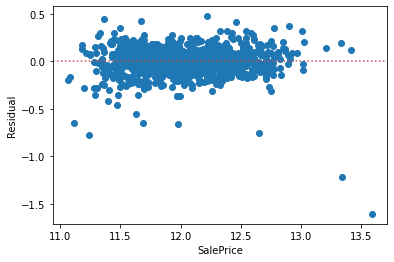

In [150]:
# Residual analysis
y_res = y_train - y_pred_train # Residuals

# Residual v/s predictions plot
#X_train_rfe['res'] = y_res
plt.scatter( y_pred_train , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("SalePrice")
plt.ylabel("Residual")
plt.show()

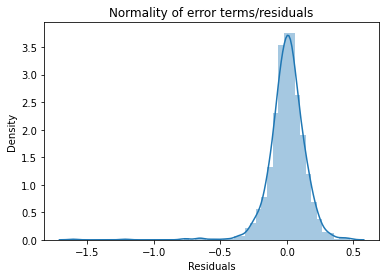

In [151]:
# Distribution of errors
p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

#### Ridge and Lasso Regression

In [152]:
# Reusable Code Block for Cross-validation, Model Building and Model Evaluation
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV

def build_model(X_train, y_train, X_test, params, model='ridge'):
  if model == 'ridge':
    estimator_model = Ridge()
  else:
    estimator_model = Lasso()
  model_cv = GridSearchCV(estimator = estimator_model, 
                          param_grid = params, 
                          scoring= 'neg_mean_absolute_error', 
                          cv = 5, 
                          return_train_score=True,
                          verbose = 1)            
  model_cv.fit(X_train, y_train)
  alpha = model_cv.best_params_["alpha"]
  print("Optimum alpha for %s is %f" %(model, alpha))
  final_model = model_cv.best_estimator_

  final_model.fit(X_train, y_train)
  y_train_pred = final_model.predict(X_train)
  y_test_pred = final_model.predict(X_test)
 
  # Model Evaluation
  print(model," Regression with ",alpha)
  print("===================================")
  print('R2 score (train) : ',r2_score(y_train,y_train_pred))
  print('R2 score (test) : ',r2_score(y_test,y_test_pred))
  print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
  print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

  return final_model, y_test_pred

### Ridge Regression

In [153]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='ridge')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Optimum alpha for ridge is 20.000000
ridge  Regression with  20
R2 score (train) :  0.8744811312557577
R2 score (test) :  0.8628703193206747
RMSE (train) :  0.14005438023005398
RMSE (test) :  0.15365041085680592


**Comment:** Ridge Regression model was able to achieve R2 score of 0.86 on test data i.e. 86% of the variance in test data can be explained by the model.

Root Mean Square Error = 0.1536 on test data, that means the prediction made by the model can off by 0.1536 unit.

### Lasso Regression

In [154]:
params = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000]}

lasso_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='lasso')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Optimum alpha for lasso is 0.001000
lasso  Regression with  0.001
R2 score (train) :  0.8743761965772907
R2 score (test) :  0.8632198641239766
RMSE (train) :  0.14011291123491332
RMSE (test) :  0.15345445775817845


### Comparing Model Coefficients

In [155]:
model_coefficients = pd.DataFrame(index=X_test_rfe.columns)
model_coefficients.rows = X_test_rfe.columns

model_coefficients['Ridge (alpha=20.0)'] = ridge_final_model.coef_
model_coefficients['Lasso (alpha=0.001)'] = lasso_final_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients

Ridge (alpha=20.0)  Lasso (alpha=0.001)
LotArea                          0.014908             0.013620
BsmtFinType1                     0.026642             0.026445
BsmtUnfSF                        0.002778             0.001226
TotalBsmtSF                      0.019441             0.017821
1stFlrSF                         0.105843             0.111171
2ndFlrSF                         0.130826             0.132435
KitchenQual                      0.030145             0.030106
HouseAge                        -0.018717            -0.018586
BuiltOrRemodelAge               -0.034208            -0.034627
BsmtExposure_4                   0.023082             0.022608
BsmtFinType2_Unf                 0.001641             0.001401
BsmtFullBath_1                   0.017257             0.016525
BsmtQual_5                       0.024699             0.024236
CentralAir_Y                     0.028831             0.028787
Condition1_Norm                  0.024135             0.024045
Fireplaces_1                     0.030974             0.029886
Fireplaces_2                     0.034854             0.033804
Foundation_PConc                 0.017525             0.017474
Functional_Typ                   0.021794             0.022177
GarageCars_1                    -0.051714            -0.050135
GarageCars_2                    -0.037216            -0.035631
GarageFinish_Unf                -0.017319            -0.015791
GarageQual_NA                   -0.043012            -0.043669
GarageType_Attchd                0.021231             0.018083
GarageType_Detchd                0.013882             0.009199
HouseStyle_2Story               -0.014302            -0.013621
LotConfig_CulDSac                0.015113             0.014448
MSZoning_RL                      0.038389             0.037804
Neighborhood_Edwards            -0.026008            -0.025827
Neighborhood_NridgHt             0.023640             0.023395
Neighborhood_Somerst             0.029012             0.028898
OverallCond_7                    0.019923             0.018959
OverallQual_4                   -0.016907            -0.016302
OverallQual_7                    0.017962             0.017138
OverallQual_8                    0.031418             0.030810
SaleCondition_Normal             0.029641             0.028959
SaleCondition_Partial            0.025832             0.025334

In [156]:
# Converting the predictions to its original scale (anti log)

test_prediction = np.round(np.exp(y_test_predicted)).astype(int)
print(test_prediction[:5])

[120394 190335 169473 194948 149479]


### Final Model

Lasso Regression produced slightly R2 score on test data than Ridge Regression. Choosing Lasso as the final model.

In [157]:
# 50 features ordered by feature importance in Lasso Regression
#model_coefficients[['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending=False)
model_coefficients[['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending=False)

Lasso (alpha=0.001)
2ndFlrSF                          0.132435
1stFlrSF                          0.111171
MSZoning_RL                       0.037804
Fireplaces_2                      0.033804
OverallQual_8                     0.030810
KitchenQual                       0.030106
Fireplaces_1                      0.029886
SaleCondition_Normal              0.028959
Neighborhood_Somerst              0.028898
CentralAir_Y                      0.028787
BsmtFinType1                      0.026445
SaleCondition_Partial             0.025334
BsmtQual_5                        0.024236
Condition1_Norm                   0.024045
Neighborhood_NridgHt              0.023395
BsmtExposure_4                    0.022608
Functional_Typ                    0.022177
OverallCond_7                     0.018959
GarageType_Attchd                 0.018083
TotalBsmtSF                       0.017821
Foundation_PConc                  0.017474
OverallQual_7                     0.017138
BsmtFullBath_1                    0.016525
LotConfig_CulDSac                 0.014448
LotArea                           0.013620
GarageType_Detchd                 0.009199
BsmtFinType2_Unf                  0.001401
BsmtUnfSF                         0.001226
HouseStyle_2Story                -0.013621
GarageFinish_Unf                 -0.015791
OverallQual_4                    -0.016302
HouseAge                         -0.018586
Neighborhood_Edwards             -0.025827
BuiltOrRemodelAge                -0.034627
GarageCars_2                     -0.035631
GarageQual_NA                    -0.043669
GarageCars_1                     -0.050135

In [158]:
model_coefficients[['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending=False).index[:10]

Index(['2ndFlrSF', '1stFlrSF', 'MSZoning_RL', 'Fireplaces_2', 'OverallQual_8',
       'KitchenQual', 'Fireplaces_1', 'SaleCondition_Normal',
       'Neighborhood_Somerst', 'CentralAir_Y'],
      dtype='object')

### Summary

- First the housing data is read and analyzed dividing the features into numerical and categorical types.


- SalePrice is the target column here.


- All the features are then analyzed, missing data handling, data cleaning are done. Trend of SalePrice is 
observed for change in individual features.


- New features are extracted, redundant features dropped and categorical features are encoded accordingly.


- Then the data in split into train and test data and feature scaling is performed.


- Target variable SalePrice is right skewed. Natural log of the same is Normal distributed, hence for model building, natural log of SalePrice is considered.


- Creating dummy variables increased the number of features greatly, highly imbalanced columns are dropped.


- Top 50 features are selected through RFE and adjusted R-square. 

- Ridge and Lasso Regression Model are built with optimum alpha calculated in GridSearchCV method.
Optimum alpha = 20.0 for ridge and 0.001 for lasso model.


- Model evaluation is done with R2 score and Root Mean Square Error.


- Lasso Regression is chosen as final model for having slightly better R-square value on test data.


- Out of 50 features in the final model, top 10 features in order of descending importance are '2ndFlrSF', '1stFlrSF', 'MSZoning_RL', 'Fireplaces_2', 'OverallQual_8','KitchenQual', 'Fireplaces_1', 'SaleCondition_Normal', 'Neighborhood_Somerst', 'CentralAir_Y'


- Model coefficients are listed in a table along with the corresponding features , for example natural log of SalePrice will change by 0.124911 with unit change in the feature '1stFlrSF' when all the features remain constant. Negative sign in the coefficient signifies negative correlation between the predictor and target variable. 


- Predicted value of SalePrice is tranformed into its original scale by performing antilog. 



### Subjective Questions

**Question#1 What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?**

In [159]:
params = {'alpha': [ridge_final_model.alpha * 2]}

ridge_double_alpla_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='ridge')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Optimum alpha for ridge is 40.000000
ridge  Regression with  40
R2 score (train) :  0.8738655740830925
R2 score (test) :  0.8614279210058255
RMSE (train) :  0.14039738060966275
RMSE (test) :  0.15445638279098745


In [160]:

params = {'alpha': [ lasso_final_model.alpha * 2]}

lasso_double_alpla_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='lasso')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Optimum alpha for lasso is 0.002000
lasso  Regression with  0.002
R2 score (train) :  0.8732840108822111
R2 score (test) :  0.8617533054856525
RMSE (train) :  0.14072067082457884
RMSE (test) :  0.15427493481220578


In [161]:
model_coefficients = pd.DataFrame(index=X_test_rfe.columns)
model_coefficients.rows = X_test_rfe.columns

model_coefficients['Ridge (alpha=20.0) - Original'] = ridge_final_model.coef_
model_coefficients['Lasso (alpha=0.001 - Original)'] = lasso_final_model.coef_
model_coefficients['Ridge (alpha=40.0) - DoubledAlpha'] = ridge_double_alpla_model.coef_
model_coefficients['Lasso (alpha=0.002 - DoubledAlpha)'] = lasso_double_alpla_model.coef_

pd.set_option('display.max_rows', None)
model_coefficients.sort_values(by=['Ridge (alpha=40.0) - DoubledAlpha','Lasso (alpha=0.002 - DoubledAlpha)'],ascending=False)

Ridge (alpha=20.0) - Original  \
2ndFlrSF                                    0.130826   
1stFlrSF                                    0.105843   
MSZoning_RL                                 0.038389   
Fireplaces_2                                0.034854   
OverallQual_8                               0.031418   
Fireplaces_1                                0.030974   
KitchenQual                                 0.030145   
CentralAir_Y                                0.028831   
SaleCondition_Normal                        0.029641   
Neighborhood_Somerst                        0.029012   
BsmtQual_5                                  0.024699   
BsmtFinType1                                0.026642   
SaleCondition_Partial                       0.025832   
TotalBsmtSF                                 0.019441   
Neighborhood_NridgHt                        0.023640   
Condition1_Norm                             0.024135   
BsmtExposure_4                              0.023082   
Functional_Typ                              0.021794   
OverallCond_7                               0.019923   
GarageType_Attchd                           0.021231   
OverallQual_7                               0.017962   
Foundation_PConc                            0.017525   
BsmtFullBath_1                              0.017257   
LotArea                                     0.014908   
LotConfig_CulDSac                           0.015113   
GarageType_Detchd                           0.013882   
BsmtUnfSF                                   0.002778   
BsmtFinType2_Unf                            0.001641   
HouseStyle_2Story                          -0.014302   
GarageFinish_Unf                           -0.017319   
OverallQual_4                              -0.016907   
HouseAge                                   -0.018717   
Neighborhood_Edwards                       -0.026008   
GarageCars_2                               -0.037216   
BuiltOrRemodelAge                          -0.034208   
GarageQual_NA                              -0.043012   
GarageCars_1                               -0.051714   

                       Lasso (alpha=0.001 - Original)  \
2ndFlrSF                                     0.132435   
1stFlrSF                                     0.111171   
MSZoning_RL                                  0.037804   
Fireplaces_2                                 0.033804   
OverallQual_8                                0.030810   
Fireplaces_1                                 0.029886   
KitchenQual                                  0.030106   
CentralAir_Y                                 0.028787   
SaleCondition_Normal                         0.028959   
Neighborhood_Somerst                         0.028898   
BsmtQual_5                                   0.024236   
BsmtFinType1                                 0.026445   
SaleCondition_Partial                        0.025334   
TotalBsmtSF                                  0.017821   
Neighborhood_NridgHt                         0.023395   
Condition1_Norm                              0.024045   
BsmtExposure_4                               0.022608   
Functional_Typ                               0.022177   
OverallCond_7                                0.018959   
GarageType_Attchd                            0.018083   
OverallQual_7                                0.017138   
Foundation_PConc                             0.017474   
BsmtFullBath_1                               0.016525   
LotArea                                      0.013620   
LotConfig_CulDSac                            0.014448   
GarageType_Detchd                            0.009199   
BsmtUnfSF                                    0.001226   
BsmtFinType2_Unf                             0.001401   
HouseStyle_2Story                           -0.013621   
GarageFinish_Unf                            -0.015791   
OverallQual_4                               -0.016302   
HouseAge                                    -0.018586   
Neighborhood_

In [162]:
model_coefficients.sort_values(by=['Ridge (alpha=20.0) - Original'],ascending=False).index

Index(['2ndFlrSF', '1stFlrSF', 'MSZoning_RL', 'Fireplaces_2', 'OverallQual_8',
       'Fireplaces_1', 'KitchenQual', 'SaleCondition_Normal',
       'Neighborhood_Somerst', 'CentralAir_Y', 'BsmtFinType1',
       'SaleCondition_Partial', 'BsmtQual_5', 'Condition1_Norm',
       'Neighborhood_NridgHt', 'BsmtExposure_4', 'Functional_Typ',
       'GarageType_Attchd', 'OverallCond_7', 'TotalBsmtSF', 'OverallQual_7',
       'Foundation_PConc', 'BsmtFullBath_1', 'LotConfig_CulDSac', 'LotArea',
       'GarageType_Detchd', 'BsmtUnfSF', 'BsmtFinType2_Unf',
       'HouseStyle_2Story', 'OverallQual_4', 'GarageFinish_Unf', 'HouseAge',
       'Neighborhood_Edwards', 'BuiltOrRemodelAge', 'GarageCars_2',
       'GarageQual_NA', 'GarageCars_1'],
      dtype='object')

In [163]:
model_coefficients.sort_values(by=['Ridge (alpha=40.0) - DoubledAlpha'],ascending=False).index

Index(['2ndFlrSF', '1stFlrSF', 'MSZoning_RL', 'Fireplaces_2', 'OverallQual_8',
       'Fireplaces_1', 'KitchenQual', 'CentralAir_Y', 'SaleCondition_Normal',
       'Neighborhood_Somerst', 'BsmtQual_5', 'BsmtFinType1',
       'SaleCondition_Partial', 'TotalBsmtSF', 'Neighborhood_NridgHt',
       'Condition1_Norm', 'BsmtExposure_4', 'Functional_Typ', 'OverallCond_7',
       'GarageType_Attchd', 'OverallQual_7', 'Foundation_PConc',
       'BsmtFullBath_1', 'LotArea', 'LotConfig_CulDSac', 'GarageType_Detchd',
       'BsmtUnfSF', 'BsmtFinType2_Unf', 'HouseStyle_2Story',
       'GarageFinish_Unf', 'OverallQual_4', 'HouseAge', 'Neighborhood_Edwards',
       'GarageCars_2', 'BuiltOrRemodelAge', 'GarageQual_NA', 'GarageCars_1'],
      dtype='object')

In [164]:
model_r2 = pd.DataFrame(index=X_test_rfe.columns)
model_r2.rows = X_test_rfe.columns

model_coefficients['Ridge (alpha=20.0) - Original'] = ridge_final_model.coef_
model_coefficients['Lasso (alpha=0.001 - Original)'] = lasso_final_model.coef_
model_coefficients['Ridge (alpha=40.0) - DoubledAlpha'] = ridge_double_alpla_model.coef_
model_coefficients['Lasso (alpha=0.002 - DoubledAlpha)'] = lasso_double_alpla_model.coef_


**Question# 3 - After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?**

In [165]:
#Removing the 5 most important predictor variables from the incoming dataset

predictor_check = model_coefficients[['Lasso (alpha=0.001 - Original)']].sort_values(by='Lasso (alpha=0.001 - Original)', ascending=False).index[:5]

In [166]:
predictor_check.values

array(['2ndFlrSF', '1stFlrSF', 'MSZoning_RL', 'Fireplaces_2',
       'OverallQual_8'], dtype=object)

In [167]:
X_test_rfe3 = X_test_rfe.drop(predictor_check.values,axis=1)
X_train_rfe3 = X_train_rfe.drop(predictor_check.values,axis=1)

In [168]:
params = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000]}

lasso_final_model, y_test_predicted = build_model(X_train_rfe3, y_train, X_test_rfe3, params, model='lasso')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Optimum alpha for lasso is 0.001000
lasso  Regression with  0.001
R2 score (train) :  0.796564262813937
R2 score (test) :  0.7774235211606022
RMSE (train) :  0.1783018344015743
RMSE (test) :  0.19575263976699137


In [169]:
model_coefficients = pd.DataFrame(index=X_train_rfe3.columns)
model_coefficients.rows = X_test_rfe3.columns

model_coefficients['Lasso (alpha=0.001) Predictor Change'] = lasso_final_model.coef_

In [170]:
model_coefficients[['Lasso (alpha=0.001) Predictor Change']].sort_values(by='Lasso (alpha=0.001) Predictor Change', ascending=False)

Lasso (alpha=0.001) Predictor Change
TotalBsmtSF                                        0.097659
HouseStyle_2Story                                  0.065078
KitchenQual                                        0.056875
Fireplaces_1                                       0.040213
LotArea                                            0.035711
BsmtQual_5                                         0.032625
CentralAir_Y                                       0.029577
SaleCondition_Normal                               0.026808
OverallCond_7                                      0.023284
Foundation_PConc                                   0.021577
BsmtFinType1                                       0.018964
BsmtExposure_4                                     0.018683
OverallQual_7                                      0.015965
LotConfig_CulDSac                                  0.014869
SaleCondition_Partial                              0.014831
Neighborhood_NridgHt                               0.012750
Condition1_Norm                                    0.012158
BsmtFullBath_1                                     0.011225
Neighborhood_Somerst                               0.010976
Functional_Typ                                     0.007520
HouseAge                                           0.001913
BsmtUnfSF                                         -0.001138
GarageType_Attchd                                 -0.007752
BsmtFinType2_Unf                                  -0.009749
Neighborhood_Edwards                              -0.017522
GarageFinish_Unf                                  -0.020983
BuiltOrRemodelAge                                 -0.025916
OverallQual_4                                     -0.026335
GarageType_Detchd                                 -0.032165
GarageCars_2                                      -0.079545
GarageQual_NA                                     -0.091483
GarageCars_1                                      -0.109520